# SUPERMARKET CUSTOMER ANALYSIS
Sarah Zeta Huwaidah (JCDS 2904)

## Introduction

<div align="center">
  <img src="gettyimages-1203031244-640x640.jpg" width="600">
</div>

Industri supermarket di Amerika Serikat menghadapi persaingan yang sangat ketat akibat jumlah pemain yang sangat banyak dan terus bertambah. Dengan pasar ritel yang sangat besar dan beragam, banyak supermarket yang berusaha menarik perhatian konsumen melalui berbagai strategi harga, promosi, dan layanan. Namun, persaingan yang menjamur ini menyebabkan tekanan besar pada margin keuntungan dan memaksa para pelaku usaha untuk terus berinovasi dan meningkatkan efisiensi operasional agar tetap bertahan.

Selain itu, tren belanja konsumen yang semakin dinamis dan perubahan preferensi turut memperketat persaingan. Banyak supermarket harus bersaing tidak hanya dengan sesama toko fisik, tetapi juga dengan platform belanja online yang semakin populer. Kondisi ekonomi yang fluktuatif dan adanya tantangan seperti kenaikan biaya operasional juga menambah kompleksitas persaingan di sektor ini.

Dalam situasi seperti ini, analisis data pelanggan menjadi sangat penting bagi supermarket untuk memahami perilaku konsumen, mengidentifikasi segmen pasar yang potensial, dan mengembangkan strategi pemasaran yang tepat sasaran. Dengan menggunakan data analysis, supermarket dapat mengoptimalkan penawaran produk, meningkatkan loyalitas pelanggan, dan memperkuat posisi mereka di pasar yang sangat kompetitif ini. Oleh karena itu, melakukan analisis data terkait pelanggan supermarket di Amerika Serikat sangat relevan dan krusial untuk membantu pelaku usaha menghadapi persaingan yang ketat serta meraih keunggulan kompetitif di tengah pasar yang semakin padat dan menantang.

## Problem Statement

 "Bagaimana cara industri supermarket meningkatkan keuntungan dan penghasilan dengan memaksimalkan potensi yang dapat diperoleh dari data berisi informasi customernya agar dapat bersaing dengan industri supermarket lain?"

## Problem Goals

Terdapat tiga sasaran utama dari dilakukannya analisis terkait data customer supermarket ini, antara lain adalah:
1. Menentukan pola perilaku pembelian dari customer berdasarkan kelompok demografi yang berbeda
2. Mengidentifikasi segmentasi customer berdasarkan perilaku pembelian yang direpresentasikan oleh tiga variabel berbeda, yaitu Recency, Frequency, dan Monetary
3. Mengembangkan strategi pemasaran yang tepat sasaran terhadap segmentasi customer yang berbeda

## Stakeholder

Pelaporan mengenai hasil analisis data customer supermarket akan disampaikan ke **tim marketing dan bisnis supermarket**, terutama kepada manager dari kedua tim tersebut

## Data Understanding

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from datetime import datetime
from datetime import timedelta

import warnings 
warnings.filterwarnings('ignore')
pd.set_option('display.max_columns',200)
pd.set_option('display.max_rows',600)

INFORMASI MENGENAI TIAP KOLOM DALAM DATASET

**People & Demography Data**:
- `ID`: Customer ID.
- `Year_Birth`: Year of birth of the customer.
- `Education`: Customer's educational background.
- `Marital_Status`: Customer's marital status.
- `Income`: Customer's annual income/salary.
- `Kidhome`: Number of children in the customer's household.
- `Teenhome`: Number of teenagers in the customer's household.
- `Dt_Customer`: Date the customer registered with the company.
- `Recency`: Number of days since the customer last made a purchase.
- `Complain`: 1 if the customer filed a complaint in the last 2 years, 0 if not.

**Products Data**
- `MntWines`: Total purchases of wine products in the last 2 years.
- `MntFruits`: Total purchases of fruit products in the last 2 years.
- `MntMeatProducts`: Total purchases of meat products in the last 2 years.
- `MntFishProducts`: Total purchases of fish products in the last 2 years.
- `MntSweetProducts`: Total purchases of sweet products in the last 2 years.
- `MntGoldProducts`: Total purchases of gold products in the last 2 years.

**Place or Channel Data**
- `NumDealsPurchases`: Number of purchases made with a discount.
- `NumWebPurchases`: Number of purchases made through the company's website.
- `NumCatalogPurchases`: Number of purchases made using a catalog.
- `NumStorePurchases`: Number of purchases made directly in the store.
- `NumWebVisitsMonth`: Number of website visits in the last month.

**Promotions and Campaign Data**
- `AcceptedCmp1`: 1 if the customer accepted the first campaign offer, 0 if not.
- `AcceptedCmp2`: 1 if the customer accepted the second campaign offer, 0 if not.
- `AcceptedCmp3`: 1 if the customer accepted the third campaign offer, 0 if not.
- `AcceptedCmp4`: 1 if the customer accepted the fourth campaign offer, 0 if not.
- `AcceptedCmp5`: 1 if the customer accepted the fifth campaign offer, 0 if not.
- `Response`: 1 if the customer accepted the last campaign offer, 0 if not.

In [2]:
df=pd.read_csv('Supermarket Customers.csv',sep='\t')
display(df, df.shape)

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,88,546,172,88,88,3,8,10,4,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,1,6,2,1,6,2,1,1,2,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,49,127,111,21,42,1,8,2,10,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,4,20,10,3,5,2,2,0,4,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,43,118,46,27,15,5,5,3,6,5,0,0,0,0,0,0,3,11,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,10870,1967,Graduation,Married,61223.0,0,1,13-06-2013,46,709,43,182,42,118,247,2,9,3,4,5,0,0,0,0,0,0,3,11,0
2236,4001,1946,PhD,Together,64014.0,2,1,10-06-2014,56,406,0,30,0,0,8,7,8,2,5,7,0,0,0,1,0,0,3,11,0
2237,7270,1981,Graduation,Divorced,56981.0,0,0,25-01-2014,91,908,48,217,32,12,24,1,2,3,13,6,0,1,0,0,0,0,3,11,0
2238,8235,1956,Master,Together,69245.0,0,1,24-01-2014,8,428,30,214,80,30,61,2,6,5,10,3,0,0,0,0,0,0,3,11,0


(2240, 29)

Dataset ini memiliki 2240 baris dan 29 kolom, jumlah kolom dan baris ini dapat berubah setelah melalui proses data cleaning.

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurchases    2240 non-null   i

Masih terdapat tipe data yang belum sesuai sehingga perlu diubah saat memasuki proses data cleaning

In [4]:
display(df.describe(),df.describe(include='object'))

,ID,Year_Birth,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
count,2240.000000,2240.000000,2216.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.0,2240.0,2240.000000
mean,5592.159821,1968.805804,52247.251354,0.444196,0.506250,49.109375,303.935714,26.302232,166.950000,37.525446,27.062946,44.021875,2.325000,4.084821,2.662054,5.790179,5.316518,0.072768,0.074554,0.072768,0.064286,0.013393,0.009375,3.0,11.0,0.149107
std,3246.662198,11.984069,25173.076661,0.538398,0.544538,28.962453,336.597393,39.773434,225.715373,54.628979,41.280498,52.167439,1.932238,2.778714,2.923101,3.250958,2.426645,0.259813,0.262728,0.259813,0.245316,0.114976,0.096391,0.0,0.0,0.356274
min,0.000000,1893.000000,1730.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
25%,2828.250000,1959.000000,35303.000000,0.000000,0.000000,24.000000,23.750000,1.000000,16.000000,3.000000,1.000000,9.000000,1.000000,2.000000,0.000000,3.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
50%,5458.500000,1970.000000,51381.500000,0.000000,0.000000,49.000000,173.500000,8.000000,67.000000,12.000000,8.000000,24.000000,2.000000,4.000000,2.000000,5.000000,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
75%,8427.750000,1977.000000,68522.000000,1.000000,1.000000,74.000000,504.250000,33.000000,232.000000,50.000000,33.000000,56.000000,3.000000,6.000000,4.000000,8.000000,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
max,11191.000000,1996.000000,666666.000000,2.000000,2.000000,99.000000,1493.000000,199.000000,1725.000000,259.000000,263.000000,362.000000,15.000000,27.000000,28.000000,13.000000,20.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,3.0,11.0,1.000000


,Education,Marital_Status,Dt_Customer
count,2240,2240,2240
unique,5,8,663
top,Graduation,Married,31-08-2012
freq,1127,864,12


Melalui informasi di atas, kita dapat melihat adanya indikasi missing value pada kolom `Income`, data yang bersifat anomali pada `Year_Birth`, dan outlier ekstrim yang ada pada kolom `Income`. Seluruh masalah pada dataset ini akan ditangani saat memasuki proses data cleaning. 

In [5]:
pd.set_option('display.max_colwidth', 1000)

listData = []
for col in df.columns :
    listData.append( [col, df[col].nunique(), df[col].unique()])

desc_table = pd.DataFrame(columns=['Column Name', 'Number of Unique Values', 'Unique Values'],
                     data=listData)
desc_table

,Column Name,Number of Unique Values,Unique Values
0,ID,2240,"[5524, 2174, 4141, 6182, 5324, 7446, 965, 6177, 4855, 5899, 1994, 387, 2125, 8180, 2569, 2114, 9736, 4939, 6565, 2278, 9360, 5376, 1993, 4047, 1409, 7892, 2404, 5255, 9422, 1966, 6864, 3033, 5710, 7373, 8755, 10738, 4339, 10755, 8595, 2968, 8601, 503, 8430, 7281, 2139, 1371, 9909, 7286, 7244, 6566, 8614, 4114, 1331, 2225, 9381, 6260, 10383, 7437, 8557, 8375, 6853, 3076, 1012, 6518, 4137, 8082, 1386, 9369, 4477, 1357, 1402, 10629, 6312, 8132, 1050, 5846, 1859, 7503, 10401, 1618, 3332, 2261, 5346, 4119, 535, 5268, 273, 4452, 8504, 771, 8996, 9235, 5798, 11178, 2230, 7516, 7247, 11100, 4646, 3037, ...]"
1,Year_Birth,59,"[1957, 1954, 1965, 1984, 1981, 1967, 1971, 1985, 1974, 1950, 1983, 1976, 1959, 1952, 1987, 1946, 1980, 1949, 1982, 1979, 1951, 1969, 1986, 1989, 1963, 1970, 1973, 1943, 1975, 1996, 1968, 1964, 1977, 1978, 1955, 1966, 1988, 1948, 1958, 1972, 1960, 1945, 1991, 1962, 1953, 1961, 1956, 1992, 1900, 1893, 1990, 1947, 1899, 1993, 1994, 1941, 1944, 1995, 1940]"
2,Education,5,"[Graduation, PhD, Master, Basic, 2n Cycle]"
3,Marital_Status,8,"[Single, Together, Married, Divorced, Widow, Alone, Absurd, YOLO]"
4,Income,1974,"[58138.0, 46344.0, 71613.0, 26646.0, 58293.0, 62513.0, 55635.0, 33454.0, 30351.0, 5648.0, nan, 7500.0, 63033.0, 59354.0, 17323.0, 82800.0, 41850.0, 37760.0, 76995.0, 33812.0, 37040.0, 2447.0, 58607.0, 65324.0, 40689.0, 18589.0, 53359.0, 38360.0, 84618.0, 10979.0, 38620.0, 40548.0, 46610.0, 68657.0, 49389.0, 67353.0, 23718.0, 42429.0, 48948.0, 80011.0, 20559.0, 21994.0, 79941.0, 41728.0, 72550.0, 65486.0, 79143.0, 35790.0, 82582.0, 66373.0, 82384.0, 70287.0, 27938.0, 55954.0, 75777.0, 66653.0, 61823.0, 67680.0, 70666.0, 25721.0, 32474.0, 88194.0, 69096.0, 74854.0, 66991.0, 65031.0, 60631.0, 28332.0, 40246.0, 75251.0, 75825.0, 26326.0, 56046.0, 29760.0, 26304.0, 23559.0, 81361.0, 29440.0, 36138.0, 50388.0, 79593.0, 54178.0, 42394.0, 23626.0, 30096.0, 47916.0, 51813.0, 78497.0, 50150.0, 47823.0, 34554.0, 85693.0, 65846.0, 87195.0, 24594.0, 49096.0, 52413.0, 38557.0, 89058.0, 77298.0, ...]"
5,Kidhome,3,"[0, 1, 2]"
6,Teenhome,3,"[0, 1, 2]"
7,Dt_Customer,663,"[04-09-2012, 08-03-2014, 21-08-2013, 10-02-2014, 19-01-2014, 09-09-2013, 13-11-2012, 08-05-2013, 06-06-2013, 13-03-2014, 15-11-2013, 10-10-2012, 24-11-2012, 24-12-2012, 31-08-2012, 28-03-2013, 03-11-2012, 08-08-2012, 06-01-2013, 23-12-2012, 11-01-2014, 18-03-2013, 02-01-2013, 27-05-2013, 20-02-2013, 31-05-2013, 22-11-2013, 22-05-2014, 11-05-2013, 29-10-2012, 29-08-2013, 31-12-2013, 02-09-2013, 11-02-2014, 01-02-2013, 29-04-2013, 12-03-2013, 05-11-2013, 02-10-2013, 28-06-2014, 09-11-2012, 24-05-2013, 01-01-2014, 08-11-2012, 12-05-2014, 11-08-2012, 07-06-2014, 12-06-2013, 19-11-2012, 02-04-2013, 28-04-2014, 17-06-2013, 03-03-2014, 04-07-2013, 07-09-2012, 18-02-2013, 11-06-2013, 06-12-2013, 21-05-2013, 11-05-2014, 19-03-2014, 27-09-2013, 08-04-2013, 11-09-2012, 14-09-2012, 17-03-2013, 05-04-2013, 30-04-2014, 19-12-2012, 27-08-2012, 12-10-2012, 04-09-2013, 29-08-2012, 23-06-2013, 03-07-2013, 25-02-2014, 11-08-2013, 16-07-2013, 28-05-2014, 21-01-2014, 27-05-2014, 23-11-2013, 23-03-2014,..."
8,Recency,100,"[58, 38, 26, 94, 16, 34, 32, 19, 68, 11, 59, 82, 53, 23, 51, 20, 91, 86, 41, 42, 63, 0, 69, 89, 4, 96, 56, 31, 8, 55, 37, 76, 99, 3, 88, 80, 72, 24, 92, 39, 29, 2, 54, 57, 30, 12, 18, 75, 90, 1, 25, 40, 9, 87, 5, 95, 48, 70, 79, 45, 84, 44, 43, 35, 15, 17, 46, 27, 74, 85, 65, 13, 83, 10, 21, 61, 73, 47, 36, 49, 28, 64, 98, 78, 77, 81, 14, 52, 93, 50, 60, 66, 97, 62, 6, 33, 67, 22, 71, 7]"
9,MntWines,776,"[635, 11, 426, 173, 520, 235, 76, 14, 28, 5, 6, 194, 233, 3, 1006, 53, 84, 1012, 4, 86, 1, 867, 384, 270, 36, 684, 8, 112, 110, 96, 482, 40, 702, 55, 437, 421, 13, 9, 81, 123, 48, 826, 245, 650, 12, 510, 328, 984, 295, 447, 712, 452, 523, 546, 398, 10, 688, 247, 856, 496, 25, 258, 565, 2, 721, 1032, 577, 64, 163, 17, 130, 292, 350, 135, 230, 7, 445, 15, 27, 505, 51, 207, 41, 386, 562, 217, 144, 454, 4

## Data Cleaning

In [6]:
df_cleaned = df.copy()
df_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurchases    2240 non-null   i

### Data Type Manipulation

Saya mengubah tipe data untuk kolom `ID` dan `Dt_Customer` menjadi object dan datetime. `ID` diubah menjadi string karena walaupun berbentuk kumpulan angka, ID tidak dapat dilakukan operasi matematika karena merupakan identifier untuk customer. `Year_Birth` diubah menjadi format tanggal karena sebelumnya berupa object.

In [7]:
df_cleaned['ID'] = df_cleaned['ID'].astype('str')
df_cleaned['Year_Birth'] = pd.to_datetime(df_cleaned['Year_Birth'], format='%Y').dt.year
df_cleaned['Dt_Customer'] = pd.to_datetime(df_cleaned['Dt_Customer'], format='%d-%m-%Y')
df_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   ID                   2240 non-null   object        
 1   Year_Birth           2240 non-null   int32         
 2   Education            2240 non-null   object        
 3   Marital_Status       2240 non-null   object        
 4   Income               2216 non-null   float64       
 5   Kidhome              2240 non-null   int64         
 6   Teenhome             2240 non-null   int64         
 7   Dt_Customer          2240 non-null   datetime64[ns]
 8   Recency              2240 non-null   int64         
 9   MntWines             2240 non-null   int64         
 10  MntFruits            2240 non-null   int64         
 11  MntMeatProducts      2240 non-null   int64         
 12  MntFishProducts      2240 non-null   int64         
 13  MntSweetProducts     2240 non-nul

### Drop Unused Columns

Saya menghapus kolom `Z_CostContact` dan `Z_Revenue` karena tidak akan digunakan untuk analisis

In [8]:
df_cleaned = df_cleaned.drop(['Z_CostContact','Z_Revenue'], axis=1)
df_cleaned.columns

Index(['ID', 'Year_Birth', 'Education', 'Marital_Status', 'Income', 'Kidhome',
       'Teenhome', 'Dt_Customer', 'Recency', 'MntWines', 'MntFruits',
       'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
       'AcceptedCmp2', 'Complain', 'Response'],
      dtype='object')

### Missing Value 

In [9]:
df_cleaned.isna().sum()

ID                      0
Year_Birth              0
Education               0
Marital_Status          0
Income                 24
Kidhome                 0
Teenhome                0
Dt_Customer             0
Recency                 0
MntWines                0
MntFruits               0
MntMeatProducts         0
MntFishProducts         0
MntSweetProducts        0
MntGoldProds            0
NumDealsPurchases       0
NumWebPurchases         0
NumCatalogPurchases     0
NumStorePurchases       0
NumWebVisitsMonth       0
AcceptedCmp3            0
AcceptedCmp4            0
AcceptedCmp5            0
AcceptedCmp1            0
AcceptedCmp2            0
Complain                0
Response                0
dtype: int64

Pada kolom `Income`, terdapat 24 baris yang mengandung missing value dan persentasenya adalah 1.07% dari keseluruhan jumlah data. Persentase ini sebenarnya memungkinkan untuk melakukan drop pada baris missing value karena persentasenya masih kurang dari 5%. Namun, di kasus ini saya akan melakukan pengisian missing value berdasarkan median Income per tingkat pendidikan.

In [10]:
income_missing_percentage = round(100*(df['Income'].isna().sum()/len(df_cleaned)),2)
print(f'Persentase missing value pada kolom income adalah sebesar {income_missing_percentage} %')

Persentase missing value pada kolom income adalah sebesar 1.07 %


In [11]:
df_cleaned[df_cleaned['Income'].isna()]

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response
10,1994,1983,Graduation,Married,NaN,1,0,2013-11-15,11,5,5,6,0,2,1,1,1,0,2,7,0,0,0,0,0,0,0
27,5255,1986,Graduation,Single,NaN,1,0,2013-02-20,19,5,1,3,3,263,362,0,27,0,0,1,0,0,0,0,0,0,0
43,7281,1959,PhD,Single,NaN,0,0,2013-11-05,80,81,11,50,3,2,39,1,1,3,4,2,0,0,0,0,0,0,0
48,7244,1951,Graduation,Single,NaN,2,1,2014-01-01,96,48,5,48,6,10,7,3,2,1,4,6,0,0,0,0,0,0,0
58,8557,1982,Graduation,Single,NaN,1,0,2013-06-17,57,11,3,22,2,2,6,2,2,0,3,6,0,0,0,0,0,0,0
71,10629,1973,2n Cycle,Married,NaN,1,0,2012-09-14,25,25,3,43,17,4,17,3,3,0,3,8,0,0,0,0,0,0,0
90,8996,1957,PhD,Married,NaN,2,1,2012-11-19,4,230,42,192,49,37,53,12,7,2,8,9,0,0,0,0,0,0,0
91,9235,1957,Graduation,Single,NaN,1,1,2014-05-27,45,7,0,8,2,0,1,1,1,0,2,7,0,0,0,0,0,0,0
92,5798,1973,Master,Together,NaN,0,0,2013-11-23,87,445,37,359,98,28,18,1,2,4,8,1,0,0,0,0,0,0,0
128,8268,1961,PhD,Married,NaN,0,1,2013-07-11,23,352,0,27,10,0,15,3,6,1,7,6,0,0,0,0,0,0,0


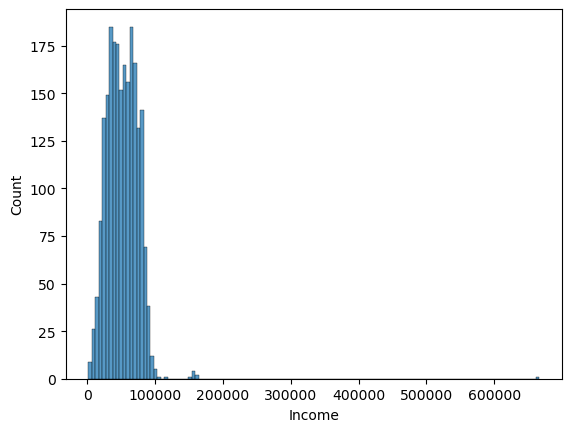

In [12]:
sns.histplot(data=df_cleaned, x='Income')
plt.show()

Berdasarkan visualisasi histogram di atas, distribusi kolom `Income` tergolong tidak mengikuti pola distribusi normal sehingga pengisian untuk missing value lebih bijak jika menggunakan median dari income di kolom Education.

In [13]:
df_cleaned['Income'] = df_cleaned.groupby('Education')['Income'].transform(lambda x: x.fillna(x.median()))
df_cleaned[df_cleaned['Income'].isna()]

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response


### Outlier and Anomalies

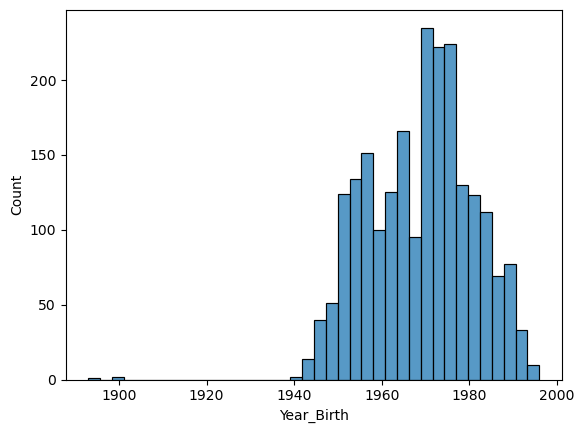

In [14]:
sns.histplot(data=df_cleaned, x='Year_Birth')
plt.show()

Berdasarkan visualisasi histogram di atas, terdapat outlier berdasarkan tahun kelahiran customer yaitu di sekitar tahun 1900-an. Tahun kelahiran ini dapat dikatakan sebagai anomali karena tidak mungkin customer dengan usia yang sangat sepuh mampu melakukan transaksi sendirian di supermarket. Maka, dalam hal ini tahun kelahiran di bawah 1920 akan dihilangkan.

In [15]:
df_cleaned[df_cleaned['Year_Birth'] < 1920]

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response
192,7829,1900,2n Cycle,Divorced,36640.0,1,0,2013-09-26,99,15,6,8,7,4,25,1,2,1,2,5,0,0,0,0,0,1,0
239,11004,1893,2n Cycle,Single,60182.0,0,1,2014-05-17,23,8,0,5,7,0,2,1,1,0,2,4,0,0,0,0,0,0,0
339,1150,1899,PhD,Together,83532.0,0,0,2013-09-26,36,755,144,562,104,64,224,1,4,6,4,1,0,0,1,0,0,0,0


In [16]:
df_cleaned=df_cleaned[df_cleaned['Year_Birth']>1920]
df_cleaned.shape

(2237, 27)

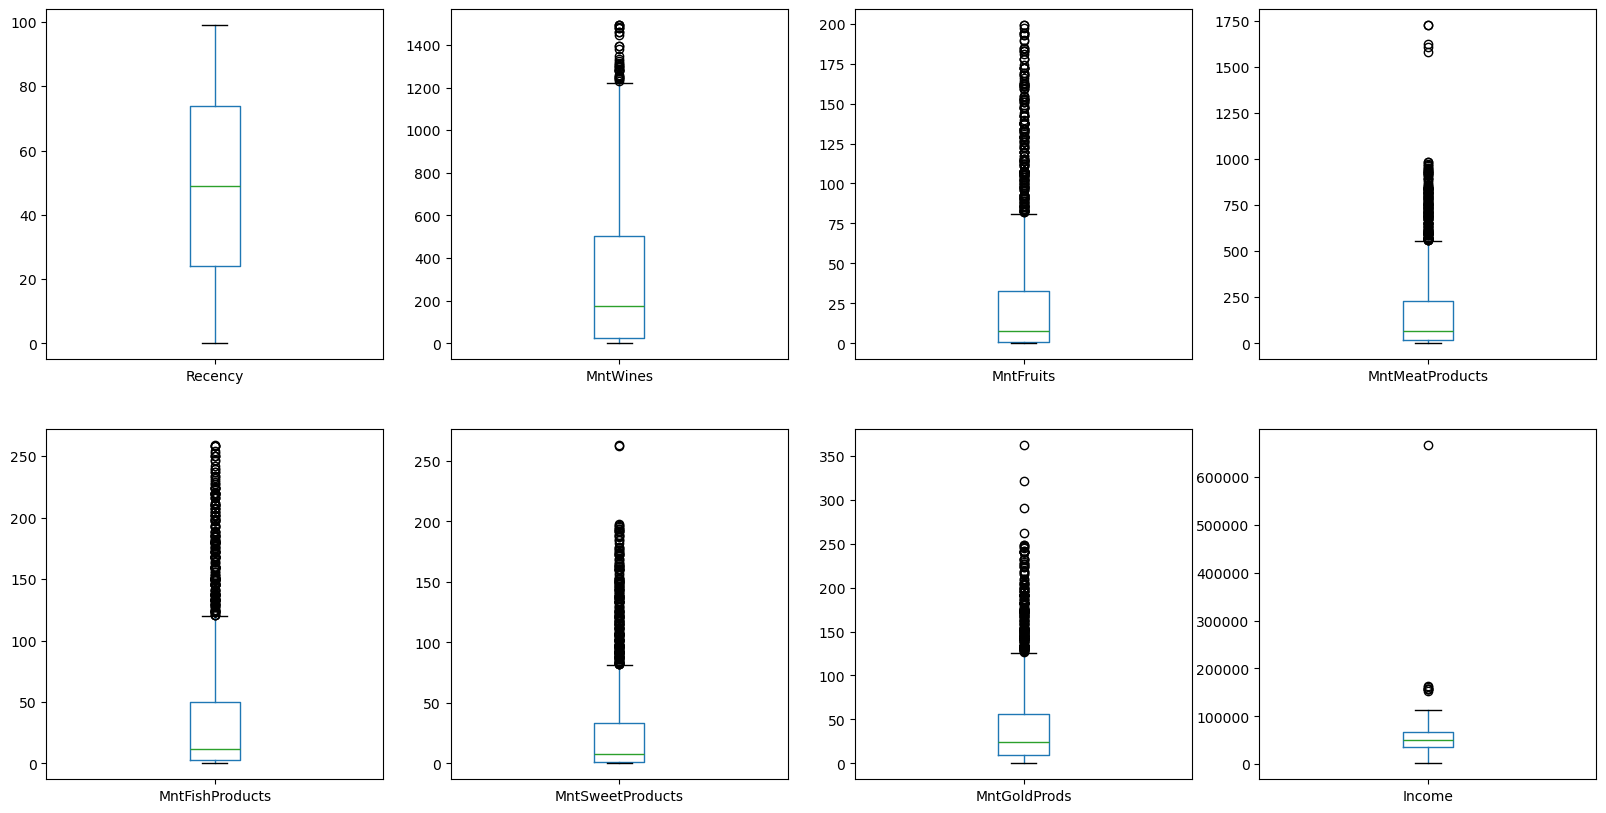

In [17]:
numerical_column = ['Recency', 'MntWines', 'MntFruits',
       'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'Income']

fig, axes = plt.subplots(nrows=2, ncols=4,figsize=(20,10))
for i,el in enumerate(numerical_column):
    a = df_cleaned.boxplot(el, ax=axes.flatten()[i],grid=False)
plt.show()

Berdasarkan visualisasi boxplot di atas, terdapat outlier pada kolom `Income` yang tidak normal, yaitu yang incomenya melebihi 600000 setahun. Nilai ini sangat melampaui distribusi outlier yang terpusat di income 200000 sehingga outlier ini perlu dihilangkan karena akan sangat mempengaruhi distribusi data income. Outlier di kolom lain masih dapat dikatakan wajar karena tidak ada yang bersifat terlalu ekstrim.

In [18]:
df_cleaned[df_cleaned['Income']>600000]

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response
2233,9432,1977,Graduation,Together,666666.0,1,0,2013-06-02,23,9,14,18,8,1,12,4,3,1,3,6,0,0,0,0,0,0,0


In [19]:
df_cleaned = df_cleaned[df_cleaned['Income']<600000]
df_cleaned.shape

(2236, 27)

### Duplicates

In [20]:
df_cleaned.duplicated().sum()

0

Sumber data tidak memiliki value yang bersifat duplikat sehingga tidak ada yang perlu dihapus.

### Replace Value Names

In [21]:
pd.set_option('display.max_colwidth', 1000)

listData2 = []
for col in df_cleaned.columns :
    listData2.append( [col, df_cleaned[col].nunique(), df_cleaned[col].unique()])

desc_table2 = pd.DataFrame(columns=['Column Name', 'Number of Unique Values', 'Unique Values'],
                     data=listData2)
desc_table2

,Column Name,Number of Unique Values,Unique Values
0,ID,2236,"[5524, 2174, 4141, 6182, 5324, 7446, 965, 6177, 4855, 5899, 1994, 387, 2125, 8180, 2569, 2114, 9736, 4939, 6565, 2278, 9360, 5376, 1993, 4047, 1409, 7892, 2404, 5255, 9422, 1966, 6864, 3033, 5710, 7373, 8755, 10738, 4339, 10755, 8595, 2968, 8601, 503, 8430, 7281, 2139, 1371, 9909, 7286, 7244, 6566, 8614, 4114, 1331, 2225, 9381, 6260, 10383, 7437, 8557, 8375, 6853, 3076, 1012, 6518, 4137, 8082, 1386, 9369, 4477, 1357, 1402, 10629, 6312, 8132, 1050, 5846, 1859, 7503, 10401, 1618, 3332, 2261, 5346, 4119, 535, 5268, 273, 4452, 8504, 771, 8996, 9235, 5798, 11178, 2230, 7516, 7247, 11100, 4646, 3037, ...]"
1,Year_Birth,56,"[1957, 1954, 1965, 1984, 1981, 1967, 1971, 1985, 1974, 1950, 1983, 1976, 1959, 1952, 1987, 1946, 1980, 1949, 1982, 1979, 1951, 1969, 1986, 1989, 1963, 1970, 1973, 1943, 1975, 1996, 1968, 1964, 1977, 1978, 1955, 1966, 1988, 1948, 1958, 1972, 1960, 1945, 1991, 1962, 1953, 1961, 1956, 1992, 1990, 1947, 1993, 1994, 1941, 1944, 1995, 1940]"
2,Education,5,"[Graduation, PhD, Master, Basic, 2n Cycle]"
3,Marital_Status,8,"[Single, Together, Married, Divorced, Widow, Alone, Absurd, YOLO]"
4,Income,1972,"[58138.0, 46344.0, 71613.0, 26646.0, 58293.0, 62513.0, 55635.0, 33454.0, 30351.0, 5648.0, 52028.5, 7500.0, 63033.0, 59354.0, 17323.0, 82800.0, 41850.0, 37760.0, 76995.0, 33812.0, 37040.0, 2447.0, 58607.0, 65324.0, 40689.0, 18589.0, 53359.0, 38360.0, 84618.0, 10979.0, 38620.0, 40548.0, 46610.0, 68657.0, 49389.0, 67353.0, 23718.0, 42429.0, 48948.0, 80011.0, 20559.0, 21994.0, 55212.0, 79941.0, 41728.0, 72550.0, 65486.0, 79143.0, 35790.0, 82582.0, 66373.0, 82384.0, 70287.0, 27938.0, 55954.0, 75777.0, 66653.0, 61823.0, 67680.0, 70666.0, 25721.0, 32474.0, 88194.0, 69096.0, 74854.0, 66991.0, 46805.0, 65031.0, 60631.0, 28332.0, 40246.0, 75251.0, 75825.0, 26326.0, 56046.0, 29760.0, 26304.0, 23559.0, 81361.0, 29440.0, 36138.0, 50388.0, 79593.0, 54178.0, 50943.0, 42394.0, 23626.0, 30096.0, 47916.0, 51813.0, 78497.0, 50150.0, 47823.0, 34554.0, 85693.0, 65846.0, 87195.0, 24594.0, 49096.0, 52413.0, ...]"
5,Kidhome,3,"[0, 1, 2]"
6,Teenhome,3,"[0, 1, 2]"
7,Dt_Customer,663,"[2012-09-04 00:00:00, 2014-03-08 00:00:00, 2013-08-21 00:00:00, 2014-02-10 00:00:00, 2014-01-19 00:00:00, 2013-09-09 00:00:00, 2012-11-13 00:00:00, 2013-05-08 00:00:00, 2013-06-06 00:00:00, 2014-03-13 00:00:00, 2013-11-15 00:00:00, 2012-10-10 00:00:00, 2012-11-24 00:00:00, 2012-12-24 00:00:00, 2012-08-31 00:00:00, 2013-03-28 00:00:00, 2012-11-03 00:00:00, 2012-08-08 00:00:00, 2013-01-06 00:00:00, 2012-12-23 00:00:00, 2014-01-11 00:00:00, 2013-03-18 00:00:00, 2013-01-02 00:00:00, 2013-05-27 00:00:00, 2013-02-20 00:00:00, 2013-05-31 00:00:00, 2013-11-22 00:00:00, 2014-05-22 00:00:00, 2013-05-11 00:00:00, 2012-10-29 00:00:00, 2013-08-29 00:00:00, 2013-12-31 00:00:00, 2013-09-02 00:00:00, 2014-02-11 00:00:00, 2013-02-01 00:00:00, 2013-04-29 00:00:00, 2013-03-12 00:00:00, 2013-11-05 00:00:00, 2013-10-02 00:00:00, 2014-06-28 00:00:00, 2012-11-09 00:00:00, 2013-05-24 00:00:00, 2014-01-01 00:00:00, 2012-11-08 00:00:00, 2014-05-12 00:00:00, 2012-08-11 00:00:00, 2014-06-07 00:00:00, 2013-06-..."
8,Recency,100,"[58, 38, 26, 94, 16, 34, 32, 19, 68, 11, 59, 82, 53, 23, 51, 20, 91, 86, 41, 42, 63, 0, 69, 89, 4, 96, 56, 31, 8, 55, 37, 76, 99, 3, 88, 80, 72, 24, 92, 39, 29, 2, 54, 57, 30, 12, 18, 75, 90, 1, 25, 40, 9, 87, 5, 95, 48, 70, 79, 45, 84, 44, 43, 35, 15, 17, 46, 27, 74, 85, 65, 13, 83, 10, 21, 61, 73, 47, 36, 49, 28, 64, 98, 78, 77, 81, 14, 52, 93, 50, 60, 66, 97, 62, 6, 33, 67, 22, 71, 7]"
9,MntWines,775,"[635, 11, 426, 173, 520, 235, 76, 14, 28, 5, 6, 194, 233, 3, 1006, 53, 84, 1012, 4, 86, 1, 867, 384, 270, 36, 684, 8, 112, 110, 96, 482, 40, 702, 55, 437, 421, 13, 9, 81, 123, 48, 826, 245, 650, 12, 510, 328, 984, 295, 447, 712, 452, 523, 546, 398, 10, 688, 247, 856, 496, 25, 258, 565, 2, 721, 1032, 577, 64, 163, 17, 130, 292, 350, 135, 230, 7, 445, 15, 27, 505, 51, 207, 41, 386, 562, 217, 144, 454, 425, 1332, 527,

In [22]:
df_cleaned['Marital_Status'] = df_cleaned['Marital_Status'].replace({'Married':'Together', 'Together':'Together', 'Absurd':'Alone', 'Widow':'Alone', 'YOLO':'Alone', 'Divorced':'Alone', 'Single':'Alone'})
df_cleaned['Education']=df_cleaned['Education'].replace({'Basic':'Undergraduate','2n Cycle':'Graduate', 'Graduation':'Graduate', 'Master':'Postgraduate', 'PhD':'Postgraduate'})
display(df_cleaned['Marital_Status'].unique(),df_cleaned['Education'].unique())

array(['Alone', 'Together'], dtype=object)

array(['Graduate', 'Postgraduate', 'Undergraduate'], dtype=object)

Untuk keperluan kemudahan analisis, value dari kolom `Marital_Status` akan disederhanakan menjadi Together dan Alone saja. Selain itu, pada kolom `Education`, valuenya juga akan disederhanakan menjadi Undergraduate, Graduate, dan Postgraduate.

### Define New Variable

In [23]:
df_cleaned

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response
0,5524,1957,Graduate,Alone,58138.0,0,0,2012-09-04,58,635,88,546,172,88,88,3,8,10,4,7,0,0,0,0,0,0,1
1,2174,1954,Graduate,Alone,46344.0,1,1,2014-03-08,38,11,1,6,2,1,6,2,1,1,2,5,0,0,0,0,0,0,0
2,4141,1965,Graduate,Together,71613.0,0,0,2013-08-21,26,426,49,127,111,21,42,1,8,2,10,4,0,0,0,0,0,0,0
3,6182,1984,Graduate,Together,26646.0,1,0,2014-02-10,26,11,4,20,10,3,5,2,2,0,4,6,0,0,0,0,0,0,0
4,5324,1981,Postgraduate,Together,58293.0,1,0,2014-01-19,94,173,43,118,46,27,15,5,5,3,6,5,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,10870,1967,Graduate,Together,61223.0,0,1,2013-06-13,46,709,43,182,42,118,247,2,9,3,4,5,0,0,0,0,0,0,0
2236,4001,1946,Postgraduate,Together,64014.0,2,1,2014-06-10,56,406,0,30,0,0,8,7,8,2,5,7,0,0,0,1,0,0,0
2237,7270,1981,Graduate,Alone,56981.0,0,0,2014-01-25,91,908,48,217,32,12,24,1,2,3,13,6,0,1,0,0,0,0,0
2238,8235,1956,Postgraduate,Together,69245.0,0,1,2014-01-24,8,428,30,214,80,30,61,2,6,5,10,3,0,0,0,0,0,0,0


In [24]:
df_cleaned['Dt_Last_Purchase'] = df_cleaned['Dt_Customer'] + pd.to_timedelta(df_cleaned['Recency'], unit='D')
df_cleaned.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response,Dt_Last_Purchase
0,5524,1957,Graduate,Alone,58138.0,0,0,2012-09-04,58,635,88,546,172,88,88,3,8,10,4,7,0,0,0,0,0,0,1,2012-11-01
1,2174,1954,Graduate,Alone,46344.0,1,1,2014-03-08,38,11,1,6,2,1,6,2,1,1,2,5,0,0,0,0,0,0,0,2014-04-15
2,4141,1965,Graduate,Together,71613.0,0,0,2013-08-21,26,426,49,127,111,21,42,1,8,2,10,4,0,0,0,0,0,0,0,2013-09-16
3,6182,1984,Graduate,Together,26646.0,1,0,2014-02-10,26,11,4,20,10,3,5,2,2,0,4,6,0,0,0,0,0,0,0,2014-03-08
4,5324,1981,Postgraduate,Together,58293.0,1,0,2014-01-19,94,173,43,118,46,27,15,5,5,3,6,5,0,0,0,0,0,0,0,2014-04-23


Kolom baru `Dt_Last_Purchase` berisi value berupa tanggal customer melakukan transaksi terakhir yang dihitung dari tanggal customer pertama kali bertransaksi di supermarket dijumlahkan dengan kolom recency yang merupakan banyaknya hari sejak transaksi terakhir oleh customer.

In [25]:
df_cleaned['Dt_Last_Purchase'].max()

Timestamp('2014-10-04 00:00:00')

In [26]:
df_cleaned['Age'] = 2014 - df_cleaned['Year_Birth']
df_cleaned.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response,Dt_Last_Purchase,Age
0,5524,1957,Graduate,Alone,58138.0,0,0,2012-09-04,58,635,88,546,172,88,88,3,8,10,4,7,0,0,0,0,0,0,1,2012-11-01,57
1,2174,1954,Graduate,Alone,46344.0,1,1,2014-03-08,38,11,1,6,2,1,6,2,1,1,2,5,0,0,0,0,0,0,0,2014-04-15,60
2,4141,1965,Graduate,Together,71613.0,0,0,2013-08-21,26,426,49,127,111,21,42,1,8,2,10,4,0,0,0,0,0,0,0,2013-09-16,49
3,6182,1984,Graduate,Together,26646.0,1,0,2014-02-10,26,11,4,20,10,3,5,2,2,0,4,6,0,0,0,0,0,0,0,2014-03-08,30
4,5324,1981,Postgraduate,Together,58293.0,1,0,2014-01-19,94,173,43,118,46,27,15,5,5,3,6,5,0,0,0,0,0,0,0,2014-04-23,33


Untuk melakukan perhitungan umur pada kolom baru `Age`, saya menggunakan patokan tahun 2014 karena tahun tersebut merupakan tahun paling akhir dari tanggal customer melakukan transaksi terakhir sebelum data ini difinalisasi dan digunakan untuk analisis.

In [27]:
df_cleaned['Generations'] = pd.cut(df_cleaned['Year_Birth'], bins=[1939, 1964, 1980, float('inf')], labels=['Baby Boomers', 'Gen X', 'Millenials'], include_lowest=True)
df_cleaned.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response,Dt_Last_Purchase,Age,Generations
0,5524,1957,Graduate,Alone,58138.0,0,0,2012-09-04,58,635,88,546,172,88,88,3,8,10,4,7,0,0,0,0,0,0,1,2012-11-01,57,Baby Boomers
1,2174,1954,Graduate,Alone,46344.0,1,1,2014-03-08,38,11,1,6,2,1,6,2,1,1,2,5,0,0,0,0,0,0,0,2014-04-15,60,Baby Boomers
2,4141,1965,Graduate,Together,71613.0,0,0,2013-08-21,26,426,49,127,111,21,42,1,8,2,10,4,0,0,0,0,0,0,0,2013-09-16,49,Gen X
3,6182,1984,Graduate,Together,26646.0,1,0,2014-02-10,26,11,4,20,10,3,5,2,2,0,4,6,0,0,0,0,0,0,0,2014-03-08,30,Millenials
4,5324,1981,Postgraduate,Together,58293.0,1,0,2014-01-19,94,173,43,118,46,27,15,5,5,3,6,5,0,0,0,0,0,0,0,2014-04-23,33,Millenials


Kolom baru `Generations` akan mengelompokkan customer berdasarkan tahun kelahirannya dengan detail sebagai berikut:
- 1940 - 1964 : Baby Boomers (Sebenarnya generasi ini dimulai dari tahun 1946 namun demi kemudahan analisis, saya akan memasukkan tahun kelahiran sebelum 1946 di generasi ini)
- 1965 - 1980 : Gen X
- 1981 - 1996 : Millenials

In [28]:
df_cleaned['Total_Dependents'] = df['Kidhome'] + df['Teenhome']
df_cleaned.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response,Dt_Last_Purchase,Age,Generations,Total_Dependents
0,5524,1957,Graduate,Alone,58138.0,0,0,2012-09-04,58,635,88,546,172,88,88,3,8,10,4,7,0,0,0,0,0,0,1,2012-11-01,57,Baby Boomers,0
1,2174,1954,Graduate,Alone,46344.0,1,1,2014-03-08,38,11,1,6,2,1,6,2,1,1,2,5,0,0,0,0,0,0,0,2014-04-15,60,Baby Boomers,2
2,4141,1965,Graduate,Together,71613.0,0,0,2013-08-21,26,426,49,127,111,21,42,1,8,2,10,4,0,0,0,0,0,0,0,2013-09-16,49,Gen X,0
3,6182,1984,Graduate,Together,26646.0,1,0,2014-02-10,26,11,4,20,10,3,5,2,2,0,4,6,0,0,0,0,0,0,0,2014-03-08,30,Millenials,1
4,5324,1981,Postgraduate,Together,58293.0,1,0,2014-01-19,94,173,43,118,46,27,15,5,5,3,6,5,0,0,0,0,0,0,0,2014-04-23,33,Millenials,1


Kolom baru `Total_Dependents` yang berarti jumlah tanggungan yang dimiliki customer merupakan hasil penjumlahan dari banyak anak dan remaja di tempat tinggal customer

In [29]:
df_cleaned['Total_Amount'] = df_cleaned['MntFruits'] + df_cleaned['MntMeatProducts'] + df_cleaned['MntFishProducts'] + df_cleaned['MntSweetProducts'] + df_cleaned['MntWines'] +  df_cleaned['MntGoldProds']
df_cleaned['Total_Amount_Basic'] =  df_cleaned['MntFruits'] + df_cleaned['MntMeatProducts'] + df_cleaned['MntFishProducts'] + df_cleaned['MntSweetProducts']
df_cleaned['Total_Amount_Luxury'] = df_cleaned['MntWines'] +  df_cleaned['MntGoldProds']
df_cleaned.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response,Dt_Last_Purchase,Age,Generations,Total_Dependents,Total_Amount,Total_Amount_Basic,Total_Amount_Luxury
0,5524,1957,Graduate,Alone,58138.0,0,0,2012-09-04,58,635,88,546,172,88,88,3,8,10,4,7,0,0,0,0,0,0,1,2012-11-01,57,Baby Boomers,0,1617,894,723
1,2174,1954,Graduate,Alone,46344.0,1,1,2014-03-08,38,11,1,6,2,1,6,2,1,1,2,5,0,0,0,0,0,0,0,2014-04-15,60,Baby Boomers,2,27,10,17
2,4141,1965,Graduate,Together,71613.0,0,0,2013-08-21,26,426,49,127,111,21,42,1,8,2,10,4,0,0,0,0,0,0,0,2013-09-16,49,Gen X,0,776,308,468
3,6182,1984,Graduate,Together,26646.0,1,0,2014-02-10,26,11,4,20,10,3,5,2,2,0,4,6,0,0,0,0,0,0,0,2014-03-08,30,Millenials,1,53,37,16
4,5324,1981,Postgraduate,Together,58293.0,1,0,2014-01-19,94,173,43,118,46,27,15,5,5,3,6,5,0,0,0,0,0,0,0,2014-04-23,33,Millenials,1,422,234,188


Kolom baru `Total_Amount` merupakan total pengeluaran dari customer untuk berbagai macam produk di supermarket ini. Saya juga membagi total pengeluaran customer untuk produk luxury yaitu wine dan emas dan produk-produk dasar berupa bahan makanan seperti buah, daging, ikan, dan manisan.

In [30]:
df_cleaned['Total_Purchase'] = df_cleaned['NumWebPurchases'] + df_cleaned['NumStorePurchases']
df_cleaned.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response,Dt_Last_Purchase,Age,Generations,Total_Dependents,Total_Amount,Total_Amount_Basic,Total_Amount_Luxury,Total_Purchase
0,5524,1957,Graduate,Alone,58138.0,0,0,2012-09-04,58,635,88,546,172,88,88,3,8,10,4,7,0,0,0,0,0,0,1,2012-11-01,57,Baby Boomers,0,1617,894,723,12
1,2174,1954,Graduate,Alone,46344.0,1,1,2014-03-08,38,11,1,6,2,1,6,2,1,1,2,5,0,0,0,0,0,0,0,2014-04-15,60,Baby Boomers,2,27,10,17,3
2,4141,1965,Graduate,Together,71613.0,0,0,2013-08-21,26,426,49,127,111,21,42,1,8,2,10,4,0,0,0,0,0,0,0,2013-09-16,49,Gen X,0,776,308,468,18
3,6182,1984,Graduate,Together,26646.0,1,0,2014-02-10,26,11,4,20,10,3,5,2,2,0,4,6,0,0,0,0,0,0,0,2014-03-08,30,Millenials,1,53,37,16,6
4,5324,1981,Postgraduate,Together,58293.0,1,0,2014-01-19,94,173,43,118,46,27,15,5,5,3,6,5,0,0,0,0,0,0,0,2014-04-23,33,Millenials,1,422,234,188,11


Kolom baru `Total_Purchase` merupakan hasil penjumlahan dari berapa kali customer melakukan pembelian di website dan toko offline

In [31]:
df_cleaned['Income_Group'] = pd.cut(df_cleaned['Income'], bins = [0, 25000, 60000, 90000, df['Income'].max()], labels = ['Low Income', 'Medium Low Income', 'Medium High Income', 'High Income'], include_lowest=True)
df_cleaned.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response,Dt_Last_Purchase,Age,Generations,Total_Dependents,Total_Amount,Total_Amount_Basic,Total_Amount_Luxury,Total_Purchase,Income_Group
0,5524,1957,Graduate,Alone,58138.0,0,0,2012-09-04,58,635,88,546,172,88,88,3,8,10,4,7,0,0,0,0,0,0,1,2012-11-01,57,Baby Boomers,0,1617,894,723,12,Medium Low Income
1,2174,1954,Graduate,Alone,46344.0,1,1,2014-03-08,38,11,1,6,2,1,6,2,1,1,2,5,0,0,0,0,0,0,0,2014-04-15,60,Baby Boomers,2,27,10,17,3,Medium Low Income
2,4141,1965,Graduate,Together,71613.0,0,0,2013-08-21,26,426,49,127,111,21,42,1,8,2,10,4,0,0,0,0,0,0,0,2013-09-16,49,Gen X,0,776,308,468,18,Medium High Income
3,6182,1984,Graduate,Together,26646.0,1,0,2014-02-10,26,11,4,20,10,3,5,2,2,0,4,6,0,0,0,0,0,0,0,2014-03-08,30,Millenials,1,53,37,16,6,Medium Low Income
4,5324,1981,Postgraduate,Together,58293.0,1,0,2014-01-19,94,173,43,118,46,27,15,5,5,3,6,5,0,0,0,0,0,0,0,2014-04-23,33,Millenials,1,422,234,188,11,Medium Low Income


Dari segi penghasilan akan dikelompokkan menjadi beberapa segmen dengan detail sebagai berikut:
- Low Income : <=25000 setahun
- Medium Low Income : >25000 sampai 60000 setahun
- Medium High Income : >60000 sampai 90000 setahun
- High Income : >90000 setahun

### Final Data

In [32]:
df_cleaned

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response,Dt_Last_Purchase,Age,Generations,Total_Dependents,Total_Amount,Total_Amount_Basic,Total_Amount_Luxury,Total_Purchase,Income_Group
0,5524,1957,Graduate,Alone,58138.0,0,0,2012-09-04,58,635,88,546,172,88,88,3,8,10,4,7,0,0,0,0,0,0,1,2012-11-01,57,Baby Boomers,0,1617,894,723,12,Medium Low Income
1,2174,1954,Graduate,Alone,46344.0,1,1,2014-03-08,38,11,1,6,2,1,6,2,1,1,2,5,0,0,0,0,0,0,0,2014-04-15,60,Baby Boomers,2,27,10,17,3,Medium Low Income
2,4141,1965,Graduate,Together,71613.0,0,0,2013-08-21,26,426,49,127,111,21,42,1,8,2,10,4,0,0,0,0,0,0,0,2013-09-16,49,Gen X,0,776,308,468,18,Medium High Income
3,6182,1984,Graduate,Together,26646.0,1,0,2014-02-10,26,11,4,20,10,3,5,2,2,0,4,6,0,0,0,0,0,0,0,2014-03-08,30,Millenials,1,53,37,16,6,Medium Low Income
4,5324,1981,Postgraduate,Together,58293.0,1,0,2014-01-19,94,173,43,118,46,27,15,5,5,3,6,5,0,0,0,0,0,0,0,2014-04-23,33,Millenials,1,422,234,188,11,Medium Low Income
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,10870,1967,Graduate,Together,61223.0,0,1,2013-06-13,46,709,43,182,42,118,247,2,9,3,4,5,0,0,0,0,0,0,0,2013-07-29,47,Gen X,1,1341,385,956,13,Medium High Income
2236,4001,1946,Postgraduate,Together,64014.0,2,1,2014-06-10,56,406,0,30,0,0,8,7,8,2,5,7,0,0,0,1,0,0,0,2014-08-05,68,Baby Boomers,3,444,30,414,13,Medium High Income
2237,7270,1981,Graduate,Alone,56981.0,0,0,2014-01-25,91,908,48,217,32,12,24,1,2,3,13,6,0,1,0,0,0,0,0,2014-04-26,33,Millenials,0,1241,309,932,15,Medium Low Income
2238,8235,1956,Postgraduate,Together,69245.0,0,1,2014-01-24,8,428,30,214,80,30,61,2,6,5,10,3,0,0,0,0,0,0,0,2014-02-01,58,Baby Boomers,1,843,354,489,16,Medium High Income


## Data Overview

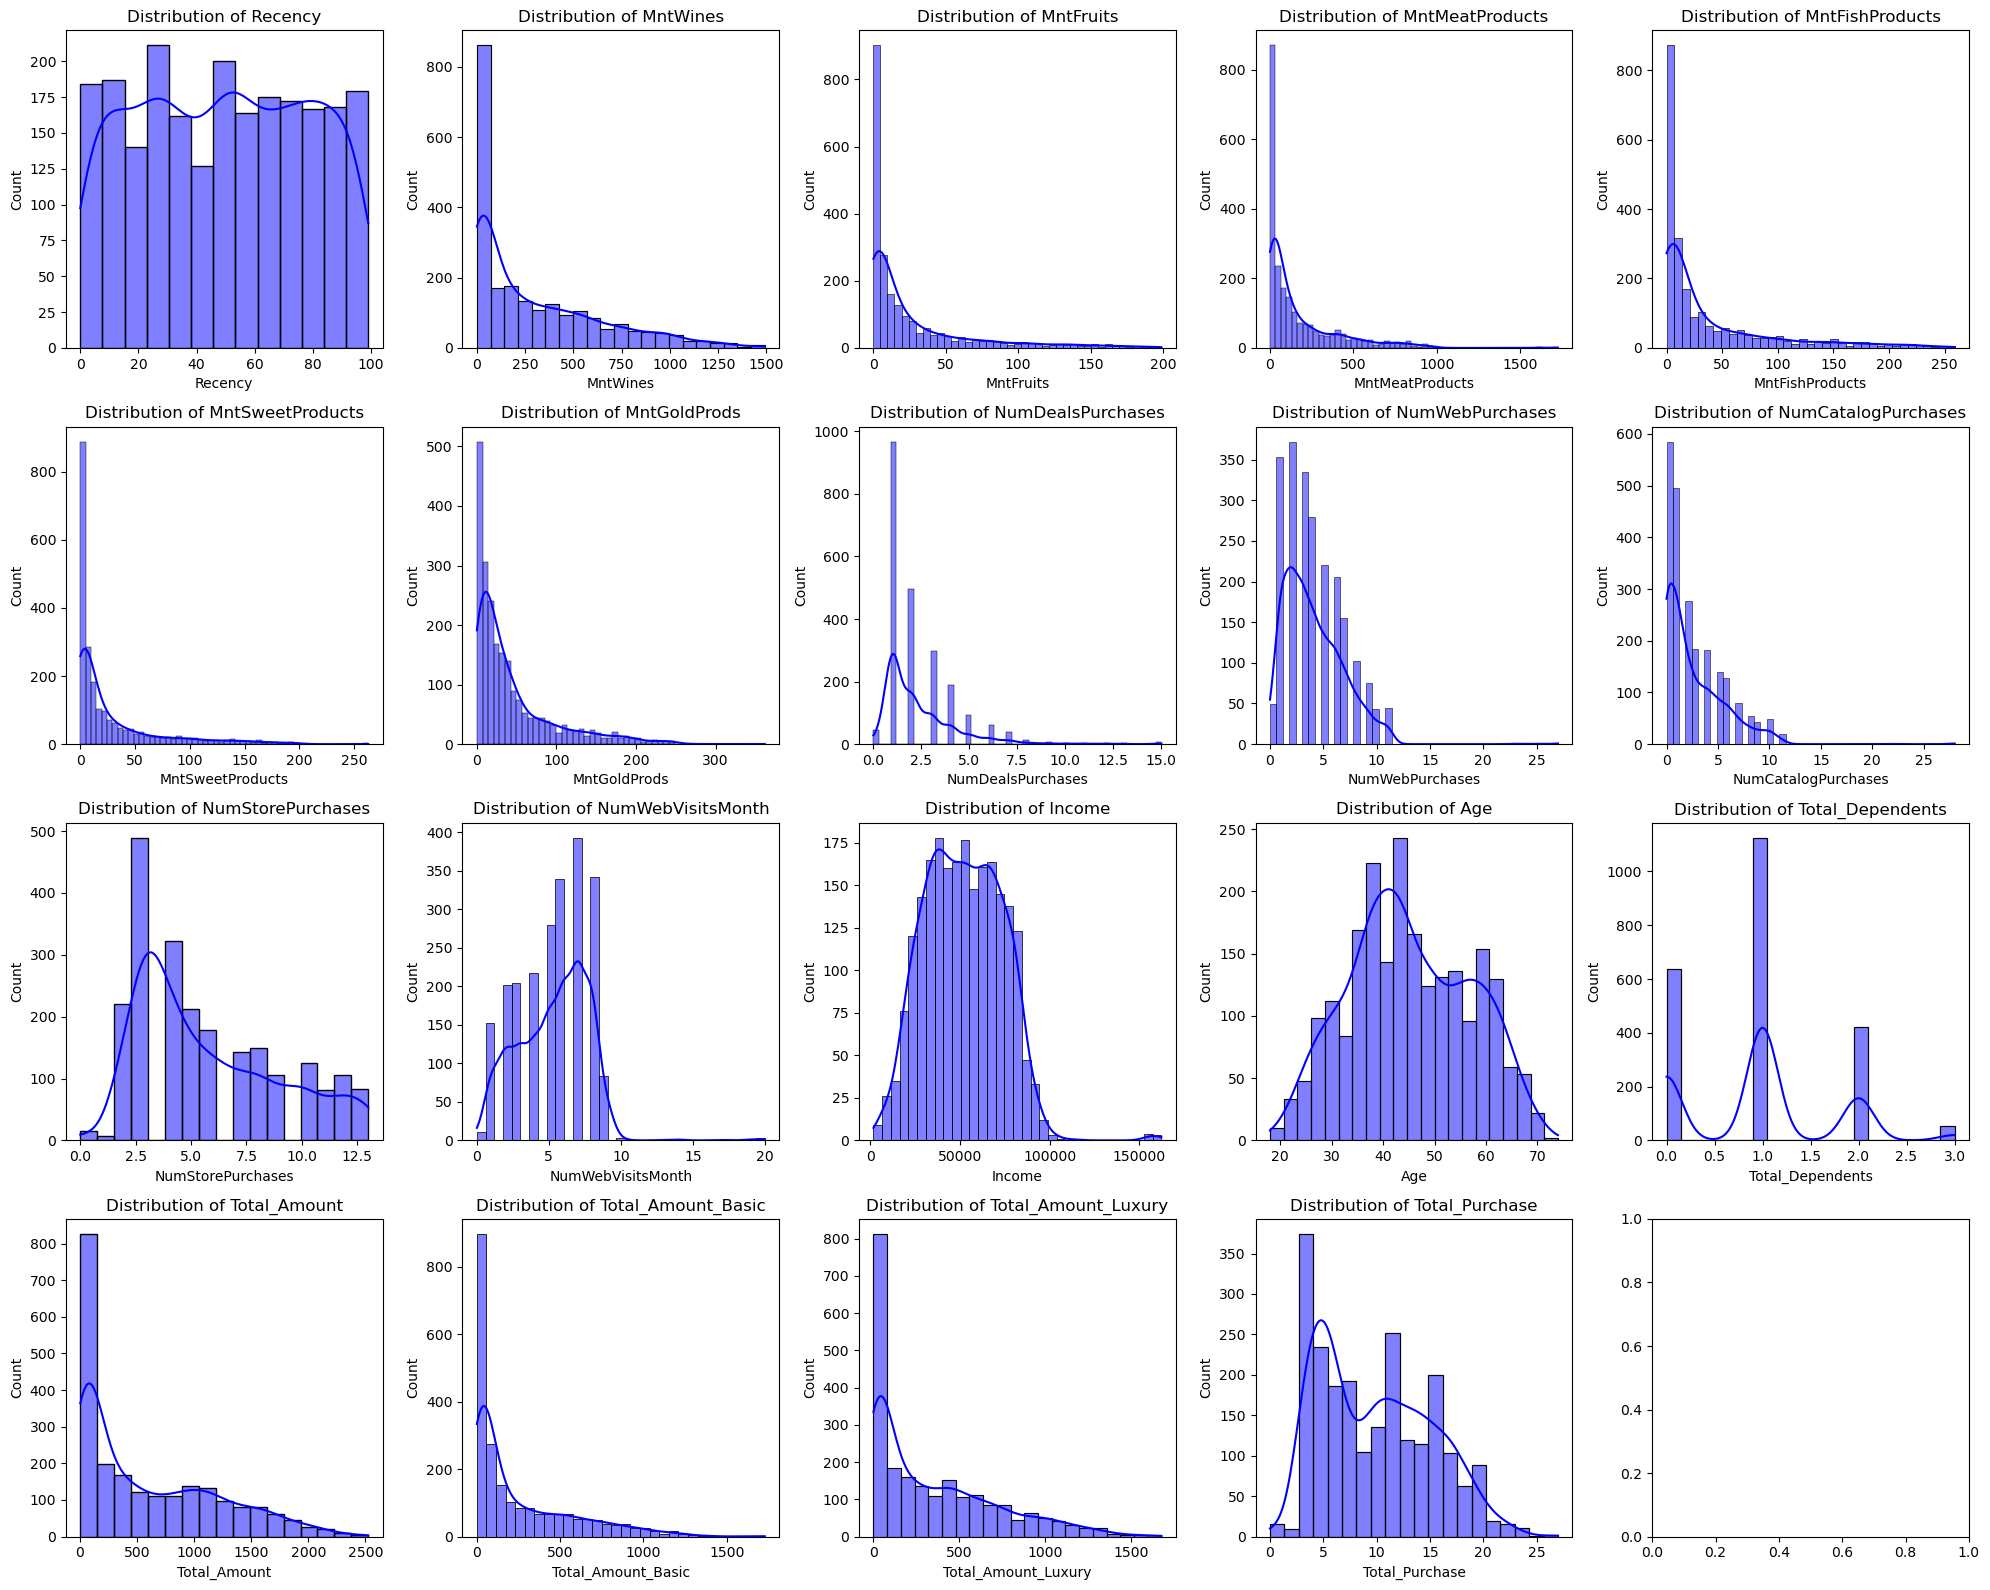

In [33]:
numerical_column2 = ['Recency', 'MntWines', 'MntFruits',
       'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth', 'Income', 'Age','Total_Dependents', 'Total_Amount', 'Total_Amount_Basic',
       'Total_Amount_Luxury', 'Total_Purchase']

fig, axes = plt.subplots(4, 5, figsize=(20, 16))
axes = axes.flatten()

for i, col in enumerate(df_cleaned[numerical_column2].columns):
    sns.histplot(df_cleaned[col], ax=axes[i], kde=True, color='blue')  # gunakan kde=True
    axes[i].set_title(f'Distribution of {col}')

plt.tight_layout()
plt.show()

Berdasarkan visualisasi histogram dari variabel numerik di atas, seluruh distribusi data dari tiap variabel tidak mengikuti pola distribusi normal. Oleh karena itu, demi analisis yang lebih representatif terhadap pola data ini, saya akan menggunakan median sebagai ukuran pusat data.

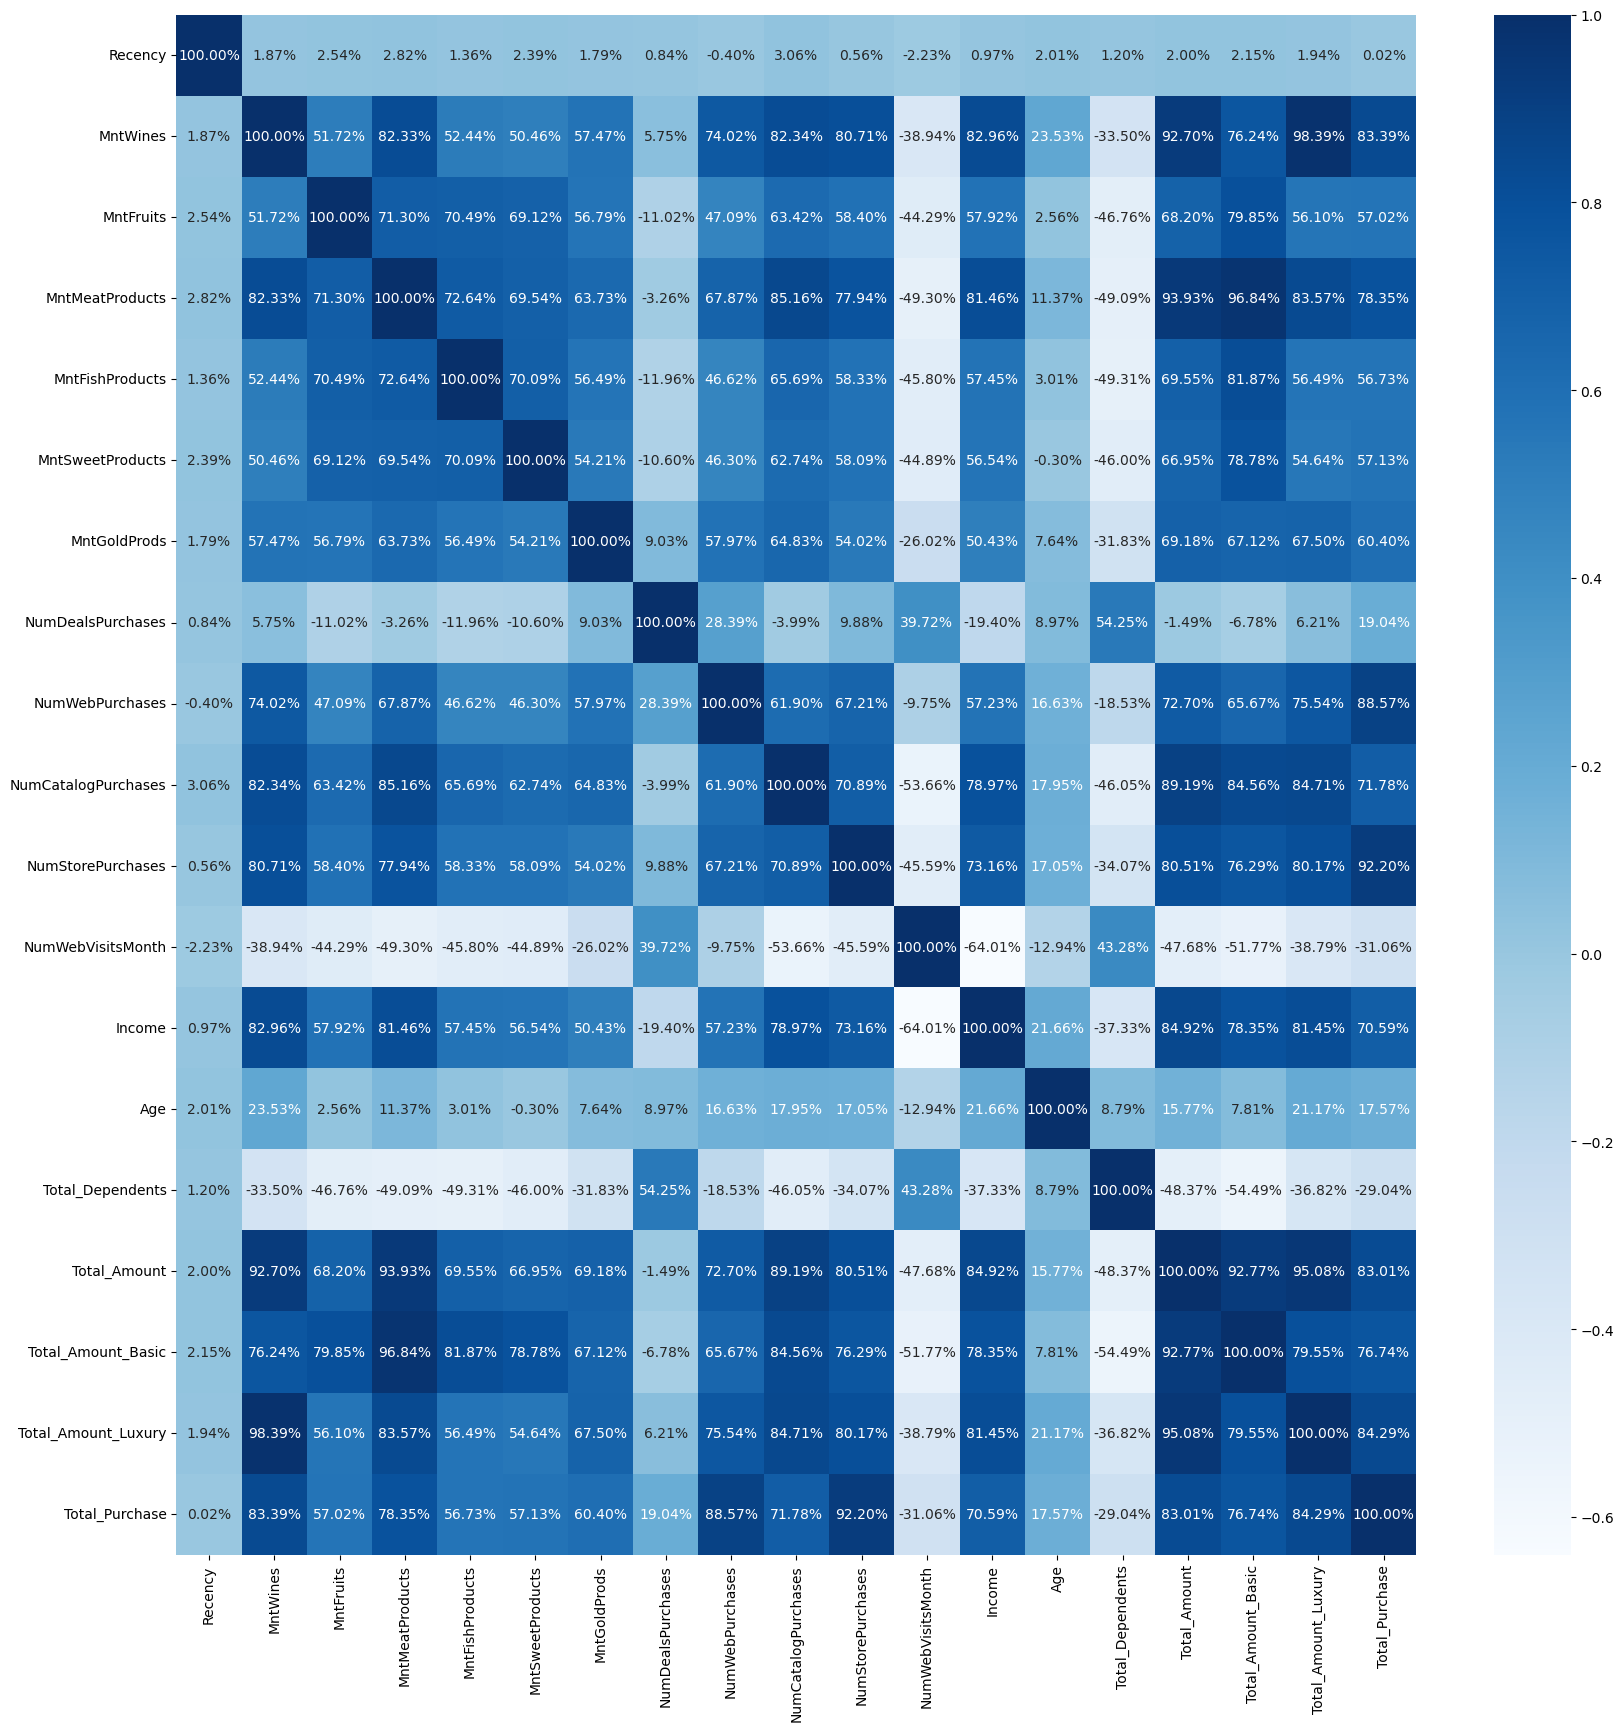

In [34]:
plt.figure(figsize=(20,20))
sns.heatmap(df_cleaned[['Recency', 'MntWines', 'MntFruits',
       'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth', 'Income', 'Age','Total_Dependents', 'Total_Amount', 'Total_Amount_Basic',
       'Total_Amount_Luxury', 'Total_Purchase']].corr(method='spearman'),annot=True, fmt='.2%', cmap = 'Blues' )
plt.show()

Insight yang bisa didapat:
- customer dengan income yang lebih tinggi akan cenderung membeli produk luxury dan produk daging lebih banyak
- customer yang membeli produk luxury cenderung juga akan membeli produk daging
- customer yang membeli produk luxury akan cenderung membelinya lewat catalog dan langsung di store
- customer yang membeli produk basic lebih cenderung membeli produknya dengan melihat catalog terlebih dahulu

In [35]:
income_count = df_cleaned.groupby('Income_Group')['ID'].count()
income_percentage = (income_count / len(df_cleaned)) * 100
income_percentage = income_percentage.reset_index().rename(columns={'ID': 'Percentage'})
display(income_count,income_percentage)

Income_Group
Low Income             242
Medium Low Income     1156
Medium High Income     786
High Income             52
Name: ID, dtype: int64

,Income_Group,Percentage
0,Low Income,10.822898
1,Medium Low Income,51.699463
2,Medium High Income,35.152057
3,High Income,2.325581


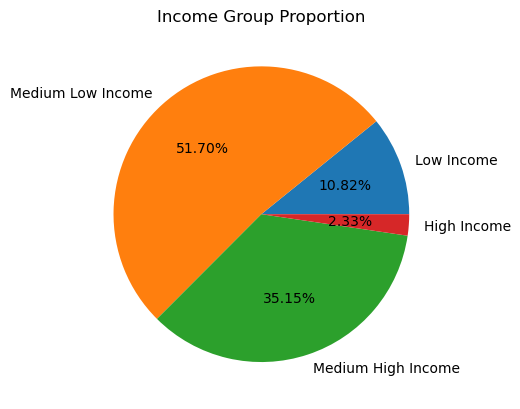

In [36]:
plt.pie(data=income_percentage,x='Percentage',labels='Income_Group', autopct='%.2f%%')
plt.title('Income Group Proportion')
plt.show()

Kelompok income terbanyak yang berbelanja di supermarket ini adalah kelompok Medium Low. Dapat dikatakan supermarket ini dari segi harga tergolong normal dan cukup bersahabat sehingga mampu menarik customer dengan penghasilan menengah untuk berbelanja.

In [37]:
gen_count = df_cleaned.groupby('Generations')['ID'].count()
gen_percentage = (gen_count / len(df_cleaned)) * 100
gen_percentage = gen_percentage.reset_index().rename(columns={'ID': 'Percentage'})
display(gen_count, gen_percentage)

Generations
Baby Boomers     783
Gen X           1068
Millenials       385
Name: ID, dtype: int64

,Generations,Percentage
0,Baby Boomers,35.017889
1,Gen X,47.763864
2,Millenials,17.218247


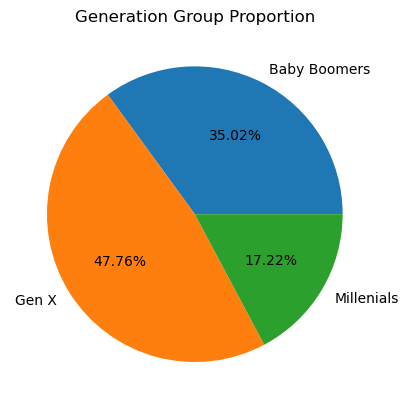

In [38]:
plt.pie(data=gen_percentage,x='Percentage',labels='Generations', autopct='%.2f%%')
plt.title('Generation Group Proportion')
plt.show()

Kelompok usia yang mendominasi jumlah customer di supermarket ini adalah Gen X yang proporsinya hampir setengah dari keseluruhan jumlah customer

In [39]:
total_dependents_genx = pd.DataFrame(df_cleaned.loc[df_cleaned['Generations'] == 'Gen X', 'Total_Dependents'])
total_dependents_genx['percentage_0'] = ((total_dependents_genx['Total_Dependents']==0).sum()/len(total_dependents_genx))*100
total_dependents_genx['percentage_with_dependents'] = 100-total_dependents_genx['percentage_0']
total_dependents_genx

,Total_Dependents,percentage_0,percentage_with_dependents
2,0,18.539326,81.460674
5,1,18.539326,81.460674
6,1,18.539326,81.460674
8,1,18.539326,81.460674
11,0,18.539326,81.460674
...,...,...,...
2228,0,18.539326,81.460674
2229,2,18.539326,81.460674
2231,0,18.539326,81.460674
2234,1,18.539326,81.460674


In [40]:
income_marital = pd.DataFrame(df_cleaned.groupby(['Marital_Status','Total_Dependents'])['Income'].median()).reset_index()
income_marital

,Marital_Status,Total_Dependents,Income
0,Alone,0,72141.5
1,Alone,1,47869.5
2,Alone,2,42720.0
3,Alone,3,46734.0
4,Together,0,72025.0
5,Together,1,47352.0
6,Together,2,44557.0
7,Together,3,41037.5


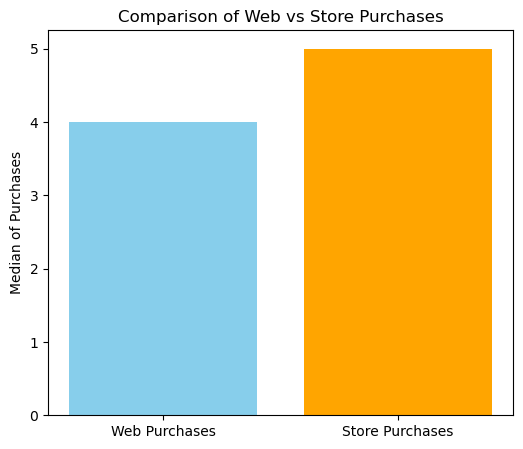

In [41]:
# Hitung total pembelian web dan store
med_web = df_cleaned['NumWebPurchases'].median()
med_store = df_cleaned['NumStorePurchases'].median()

# Siapkan data untuk bar plot
labels = ['Web Purchases', 'Store Purchases']
values = [med_web, med_store]

# Buat bar plot
plt.figure(figsize=(6, 5))
plt.bar(labels, values, color=['skyblue', 'orange'])
plt.ylabel('Median of Purchases')
plt.title('Comparison of Web vs Store Purchases')
    
plt.show()

Dapat dilihat bahwa pembelian secara offline di toko langsung lebih diminati oleh customer dibandingkan pembelian secara online di website

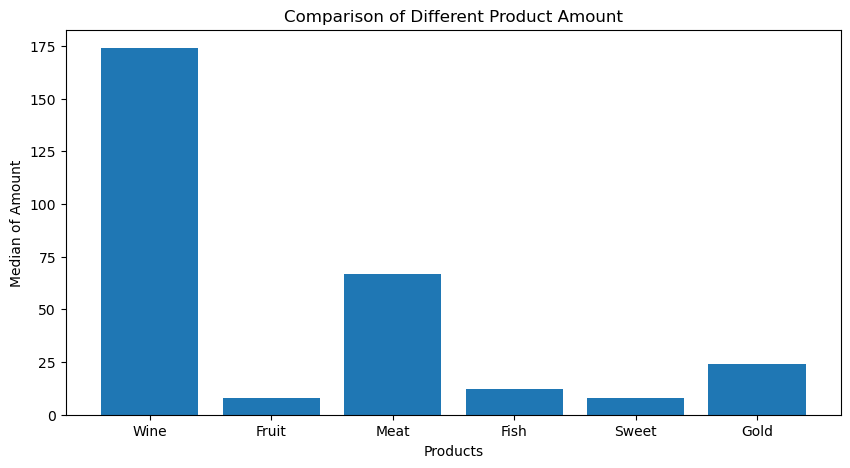

In [42]:
med_wine = df_cleaned['MntWines'].median()
med_fruit = df_cleaned['MntFruits'].median()
med_meat = df_cleaned['MntMeatProducts'].median()
med_fish = df_cleaned['MntFishProducts'].median()
med_sweet = df_cleaned['MntSweetProducts'].median()
med_gold = df_cleaned['MntGoldProds'].median()

# Siapkan data untuk bar plot
labels = ['Wine', 'Fruit', 'Meat', 'Fish', 'Sweet', 'Gold']
values = [med_wine, med_fruit, med_meat, med_fish, med_sweet, med_gold]

# Buat bar plot
plt.figure(figsize=(10, 5))
plt.bar(labels, values)
plt.xlabel('Products')
plt.ylabel('Median of Amount')
plt.title('Comparison of Different Product Amount')
    
plt.show()

Penghasilan yang diterima supermarket dalam 2 tahun terakhir lebih banyak di produk wine, disusul oleh produk daging. Dapat diasumsikan bahwa kedua produk ini lebih sering dibeli dan juga harganya cenderung lebih mahal dibanding produk-produk lainnya.

In [43]:
df_cleaned.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response,Dt_Last_Purchase,Age,Generations,Total_Dependents,Total_Amount,Total_Amount_Basic,Total_Amount_Luxury,Total_Purchase,Income_Group
0,5524,1957,Graduate,Alone,58138.0,0,0,2012-09-04,58,635,88,546,172,88,88,3,8,10,4,7,0,0,0,0,0,0,1,2012-11-01,57,Baby Boomers,0,1617,894,723,12,Medium Low Income
1,2174,1954,Graduate,Alone,46344.0,1,1,2014-03-08,38,11,1,6,2,1,6,2,1,1,2,5,0,0,0,0,0,0,0,2014-04-15,60,Baby Boomers,2,27,10,17,3,Medium Low Income
2,4141,1965,Graduate,Together,71613.0,0,0,2013-08-21,26,426,49,127,111,21,42,1,8,2,10,4,0,0,0,0,0,0,0,2013-09-16,49,Gen X,0,776,308,468,18,Medium High Income
3,6182,1984,Graduate,Together,26646.0,1,0,2014-02-10,26,11,4,20,10,3,5,2,2,0,4,6,0,0,0,0,0,0,0,2014-03-08,30,Millenials,1,53,37,16,6,Medium Low Income
4,5324,1981,Postgraduate,Together,58293.0,1,0,2014-01-19,94,173,43,118,46,27,15,5,5,3,6,5,0,0,0,0,0,0,0,2014-04-23,33,Millenials,1,422,234,188,11,Medium Low Income


In [44]:
complain_count = df_cleaned.groupby('Complain')['ID'].count().reset_index().rename(columns={'ID':'Count'})
complain_count['percentage'] = (complain_count['Count']/complain_count['Count'].sum())*100
complain_count

,Complain,Count,percentage
0,0,2216,99.105546
1,1,20,0.894454


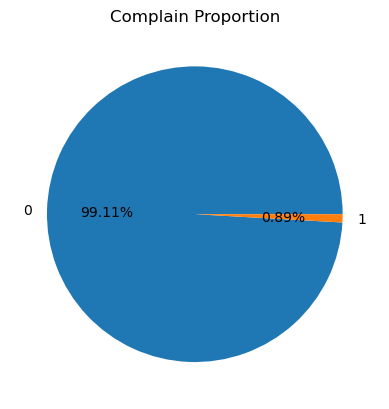

In [45]:
plt.pie(data=complain_count,x='percentage',labels='Complain', autopct='%.2f%%')
plt.title('Complain Proportion')
plt.show()

Dari segi banyaknya complain, supermarket ini tergolong sangat baik dalam pelayanannya karena sepanjang 2 tahun terakhir, hanya sebanyak 0,89% dari customer keseluruhan saja yang mengajukan komplain. Management supermarket baik di toko offline maupun website perlu dipertahankan. Selain itu, untuk lebih meningkatkan kinerjanya, komplain dari customer walaupun sedikit juga perlu diperhatikan.

Insight yang bisa didapat dari data overview:
- Terdapat hubungan yang kuat antara pembelian produk luxury dan pembelian daging. Dalam hal ini kelompok High Income perlu diberi perhatian lebih karena sumber pendapatan terbesar dari supermarket ada pada produk luxury (wine) dan daging
- Kelompok Medium Low Income disusul Medium High Income sebagai kelompok dengan proporsi customer terbesar menandakan bahwa target pelanggan supermarket adalah masyarakat dengan income menengah yang mendominasi Amerika Serikat
- Generasi yang paling banyak berbelanja di supermarket ini adalah Generasi X, didukung data bahwa proporsi gen X yang memiliki tanggungan jauh lebih banyak dibanding yang tidak memiliki tanggungan
- Customer lebih senang melakukan pembelian melalui toko offline dibanding website
- Produk yang memberikan penghasilan terbesar pada supermarket adalah wine, berhubungan dengan minat customer yang tinggi pada produk ini serta tergolong dalam produk luxury (harga cenderung lebih mahal)
- Selama 2 tahun terakhir, supermarket telah melayani customer dengan sangat baik, dibuktikan dengan rate complain yang hanya 0,89% sehingga pencapaian ini perlu dipertahankan

## Data Analysis

### Luxury/Basic Product Ratio

In [46]:
luxury_basic_ratio = pd.DataFrame(df_cleaned.groupby(['Marital_Status','Total_Dependents'])[['Total_Amount_Luxury','Total_Amount_Basic']].median()).reset_index()
luxury_basic_ratio['Ratio'] = luxury_basic_ratio['Total_Amount_Luxury']/luxury_basic_ratio['Total_Amount_Basic']
luxury_basic_ratio

,Marital_Status,Total_Dependents,Total_Amount_Luxury,Total_Amount_Basic,Ratio
0,Alone,0,506.5,576.5,0.878578
1,Alone,1,175.0,71.0,2.464789
2,Alone,2,68.0,28.0,2.428571
3,Alone,3,38.0,22.0,1.727273
4,Together,0,499.0,558.0,0.894265
5,Together,1,188.0,77.0,2.441558
6,Together,2,61.5,32.0,1.921875
7,Together,3,56.0,30.0,1.866667


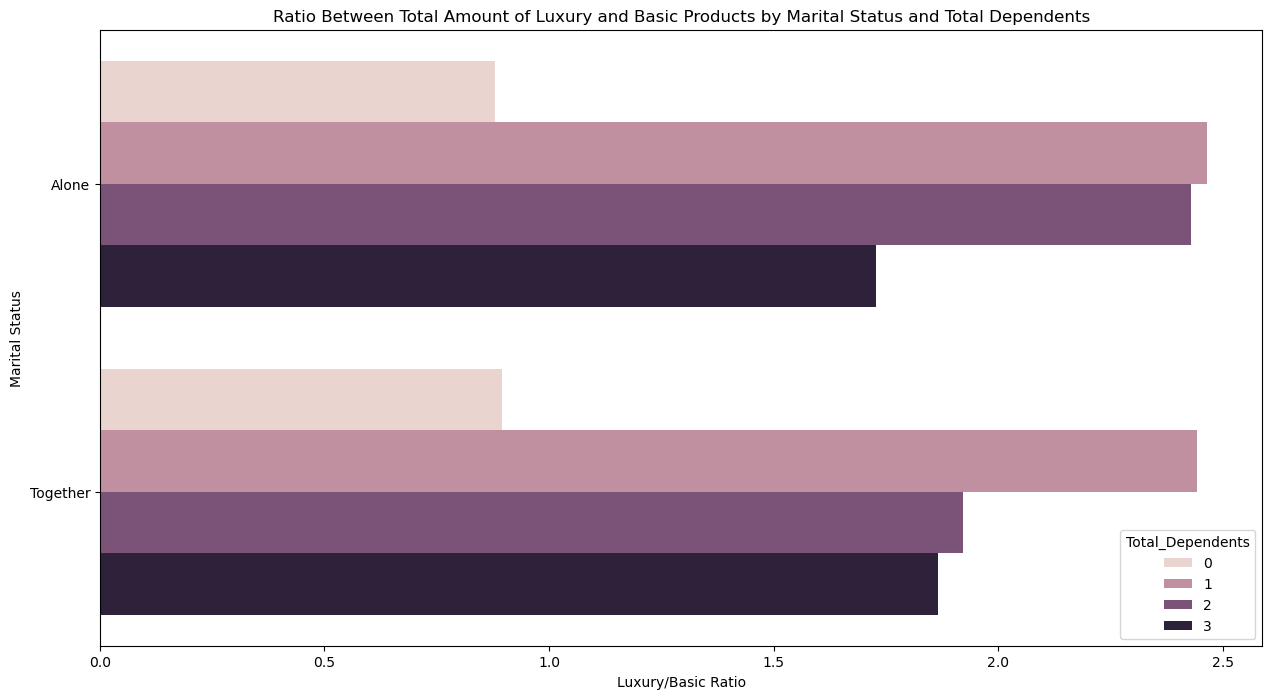

In [49]:
plt.figure(figsize=(15,8))
ax=sns.barplot(data=luxury_basic_ratio,x='Ratio',y='Marital_Status',hue='Total_Dependents')
plt.title('Ratio Between Total Amount of Luxury and Basic Products by Marital Status and Total Dependents')
plt.xlabel('Luxury/Basic Ratio')
plt.ylabel('Marital Status')

plt.show()

Customer dengan marital status alone dan together yang tidak memiliki jumlah tanggungan serta satu orang tanggungan tidak menunjukkan perbedaan yang signifikan dalam proporsi luxury/basicnya. Pola yang dapat dilihat pada visualisasi di atas adalah untuk **customer tanpa tanggungan baik yang berstatus alone atau together menunjukkan rasio Luxury/Basic paling rendah** lalu terjadi peningkatan yang signifikan untuk satu jumlah tanggungan dan terus menurun seiring jumlah tanggungan yang semakin besar. Berdasarkan analisis di data overview sebelumnya, customer tanpa tanggungan memiliki income lebih besar dibanding yang memiliki tanggungan. Jika dikaitkan dengan visualisasi di atas, **customer tanpa tanggungan dapat dikatakan lebih hemat dari segi pengeluaran biaya dan lebih mengeluarkan biaya untuk produk-produk dasar berupa bahan makanan**. Sementara itu, **ketika customer memiliki tanggungan, perilaku pembelian produk luxury meningkat secara signifikan. Namun, seiring bertambahnya jumlah tanggungan, customer akan cenderung memfokuskan pengeluaran ke produk-produk dasar**.

In [51]:
luxury_basic_ratio2 = pd.DataFrame(df_cleaned.groupby(['Income_Group'])[['Total_Amount','Total_Amount_Luxury','Total_Amount_Basic']].median()).reset_index()
luxury_basic_ratio2['Ratio'] = luxury_basic_ratio2['Total_Amount_Luxury']/luxury_basic_ratio2['Total_Amount_Basic']
luxury_basic_ratio2

,Income_Group,Total_Amount,Total_Amount_Luxury,Total_Amount_Basic,Ratio
0,Low Income,50.0,20.5,28.0,0.732143
1,Medium Low Income,145.0,84.0,45.5,1.846154
2,Medium High Income,1160.0,619.0,509.5,1.214917
3,High Income,1724.0,852.0,931.5,0.914654


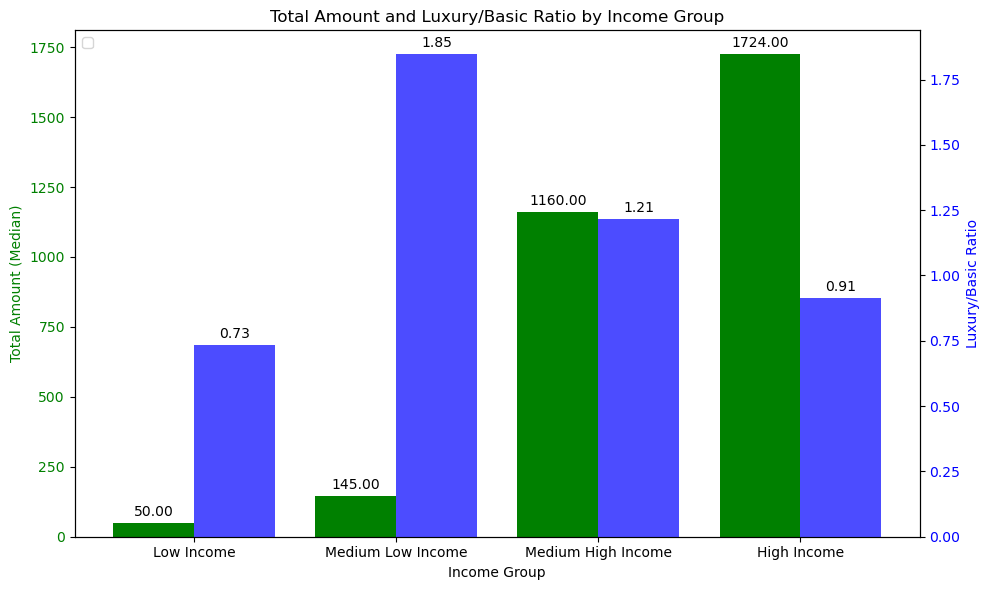

In [53]:
x = luxury_basic_ratio2['Income_Group']
total_amount = luxury_basic_ratio2['Total_Amount']
ratio = luxury_basic_ratio2['Ratio']

x_pos = np.arange(len(x))
width = 0.4  # Lebar bar

fig, ax1 = plt.subplots(figsize=(10,6))

# Bar chart Total Amount di axis kiri
bars1 = ax1.bar(x_pos - width/2, total_amount, width, label='Total Amount', color='green')
ax1.set_xlabel('Income Group')
ax1.set_ylabel('Total Amount (Median)', color='green')
ax1.tick_params(axis='y', labelcolor='green')
ax1.set_xticks(x_pos)
ax1.set_xticklabels(x)

# Buat axis kedua yang berbagi sumbu x
ax2 = ax1.twinx()

# Bar chart Proportion di axis kanan
bars2 = ax2.bar(x_pos + width/2, ratio, width, label='Ratio', color='blue', alpha=0.7)
ax2.set_ylabel('Luxury/Basic Ratio', color='blue')
ax2.tick_params(axis='y', labelcolor='blue')

# Legend gabungan
bars = bars1 + bars2
labels = [bar.get_label() for bar in bars]
ax1.legend(bars, labels, loc='upper left')

# Optional: beri label nilai di atas bar
def autolabel(ax, bars):
    for bar in bars:
        height = bar.get_height()
        ax.annotate(f'{height:.2f}',
                    xy=(bar.get_x() + bar.get_width() / 2, height),
                    xytext=(0, 3),  # offset teks
                    textcoords="offset points",
                    ha='center', va='bottom')

autolabel(ax1, bars1)
autolabel(ax2, bars2)

plt.title('Total Amount and Luxury/Basic Ratio by Income Group')
plt.tight_layout()
plt.show()

Berdasarkan visualisasi di atas, kelompok **High Income menyumbang penghasilan terbesar untuk supermarket selama 2 tahun terakhir** sedangkan untuk **rasio pembelian produk luxury/basic, kelompok Medium Low Income menempati posisi tertinggi**. Artinya, kelompok High Income menyumbang penghasilan yang cenderung setara baik untuk produk luxury dan basic sedangkan untuk kelompok Medium Low Income cenderung berat ke pengeluaran untuk produk luxury. Customer dengan kelompok High Income yang populasinya paling sedikit dibanding dengan kelompok Income lainnya berdasarkan data di atas mampu memberikan penghasilan yang paling besar. Hal ini perlu dipertahankan, jangan sampai customer dalam kelompok ini sampai pindah ke kompetitor (churn).

### Channels and Products

In [54]:
df_gen = df_cleaned.groupby('Generations')[['NumWebPurchases', 'NumStorePurchases', 'MntWines', 'MntFruits',
'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts','MntGoldProds']].median().reset_index()
df_gen

,Generations,NumWebPurchases,NumStorePurchases,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds
0,Baby Boomers,4.0,6.0,293.0,12.0,99.0,16.0,11.0,30.0
1,Gen X,3.0,4.0,135.0,6.0,52.0,10.0,7.0,21.0
2,Millenials,3.0,4.0,52.0,9.0,54.0,13.0,9.0,22.0


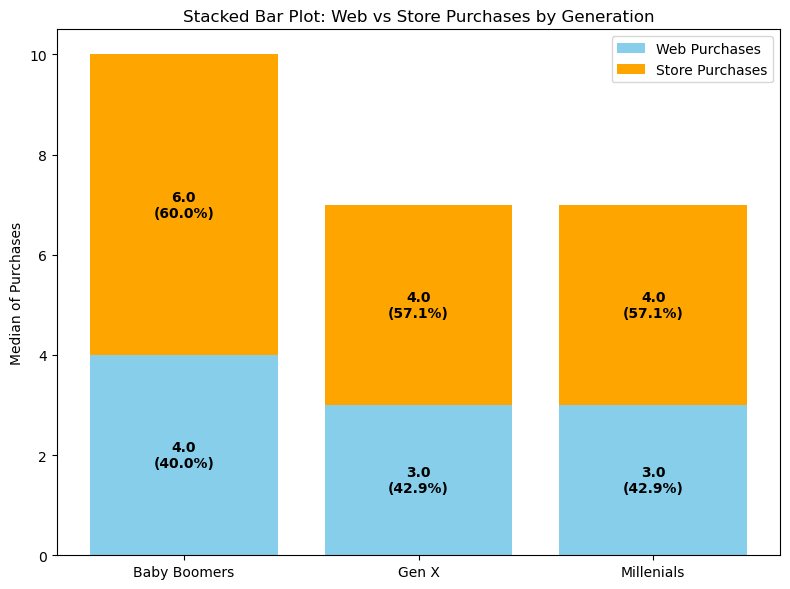

In [55]:
# Data
generations = df_gen['Generations']
web = df_gen['NumWebPurchases']
store = df_gen['NumStorePurchases']

# Hitung total pembelian per generasi
total = web + store

# Persentase
web_pct = web / total * 100
store_pct = store / total * 100

# Plot
fig, ax = plt.subplots(figsize=(8,6))

# Stacked bar
bars1 = ax.bar(generations, web, label='Web Purchases', color='skyblue')
bars2 = ax.bar(generations, store, bottom=web, label='Store Purchases', color='orange')

# Anotasi jumlah dan persentase
for i, (w, s, t) in enumerate(zip(web, store, total)):
    # Anotasi Web
    ax.text(i, w/2, f"{w}\n({web_pct.iloc[i]:.1f}%)", 
            ha='center', va='center', color='black', fontsize=10, fontweight='bold')
    # Anotasi Store
    ax.text(i, w + s/2, f"{s}\n({store_pct.iloc[i]:.1f}%)", 
            ha='center', va='center', color='black', fontsize=10, fontweight='bold')

# Label dan judul
ax.set_ylabel('Median of Purchases')
ax.set_title('Stacked Bar Plot: Web vs Store Purchases by Generation')
ax.legend(loc='upper right')
plt.tight_layout()
plt.show()

Berdasarkan visualisasi di atas, dapat dilihat bahwa **di tiap generasi pembelian langsung di toko offline menunjukkan total pembelian yang lebih besar dibandingkan dengan pembelian di website**. **Perbandingan keduanya di generasi Baby Boomers terlihat lebih jelas dibandingkan dengan dua generasi lainnya**. Artinya, pembelian langsung di toko lebih populer untuk tiap generasi yang berbeda. Pembelian di web juga masih memiliki peminat dan tidak sampai di tahap perlu dihilangkan karena kalah jauh dari segi peminat. Customer hanya lebih banyak membeli produk di toko offline.

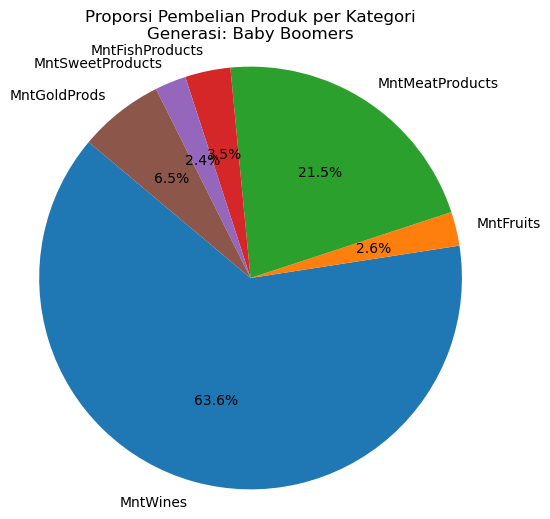

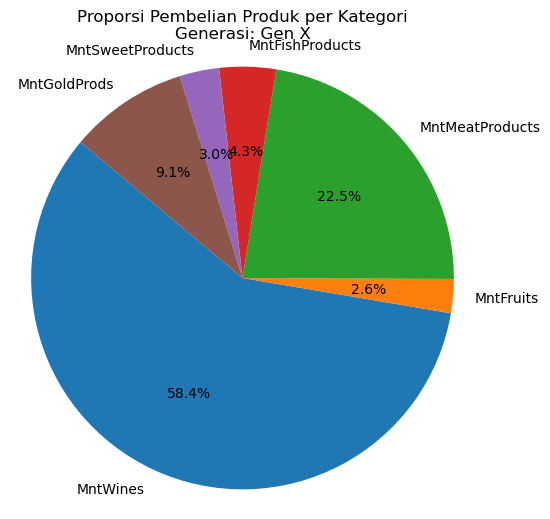

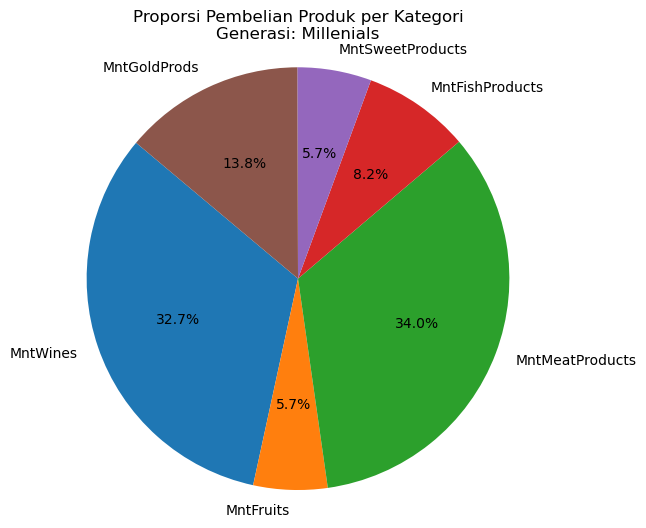

In [56]:
# Daftar kolom produk
produk_cols = ['MntWines', 'MntFruits', 'MntMeatProducts', 
               'MntFishProducts', 'MntSweetProducts', 'MntGoldProds']

# Loop untuk setiap generasi
for idx, row in df_gen.iterrows():
    plt.figure(figsize=(6,6))
    plt.pie(
        row[produk_cols], 
        labels=produk_cols, 
        autopct='%1.1f%%', 
        startangle=140
    )
    plt.title(f'Proporsi Pembelian Produk per Kategori\nGenerasi: {row["Generations"]}')
    plt.axis('equal')
    plt.show()

Berdasarkan visualisasi ketiga pie plot di atas, dapat dilihat bahwa **produk paling populer adalah wine pada Baby Boomers dan Gen X disusul dengan produk daging**. Namun, proporsi antara pembelian produk wine dan daging pada gen Millenial cenderung imbang. Proporsi pengeluaran untuk pembelian produk pada customer generasi Millenial cenderung seimbang antara produk Luxury dan Dasar bahkan lebih berat ke pengeluaran untuk produk dasar. Sementara itu, dua kelompok generasi lain lebih mengeluarkan biaya untuk membeli produk Luxury. Namun, secara keseluruhan perbedaan proporsi untuk wine dan daging dengan produk lain sangat signifikan. Artinya, **produk wine dan daging merupakan produk unggulan dari supermarket ini sehingga keberadaannya perlu dipertahankan dan dikelola dengan baik agar mampu menarik lebih banyak customer baru**.

### Campaign and Deals

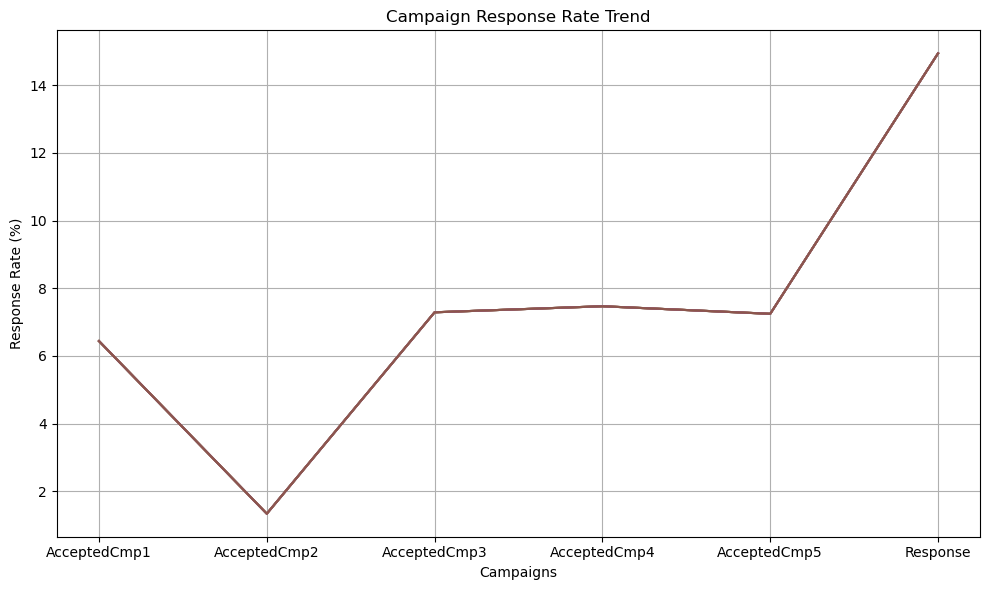

In [57]:
campaign_columns = ['AcceptedCmp1', 'AcceptedCmp2', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'Response']
response_rates = (df_cleaned[campaign_columns].sum()/len(df_cleaned))*100  # Convert to percentage

plt.figure(figsize=(10, 6))
for gen in response_rates.index:
    plt.plot(campaign_columns, response_rates)

# Add labels and title
plt.title('Campaign Response Rate Trend')
plt.xlabel('Campaigns')
plt.ylabel('Response Rate (%)')
plt.grid(True)
plt.tight_layout()

# Show the plot
plt.show()

Berdasarkan visualisasi di atas, respon customer terhadap campaign diskon dari supermarket tergolong rendah karena tingkat respon terhadap diskon tertinggi hanya sebesar 14 sekian persen dari keseluruhan jumlah customer. Namun, berdasarkan tren dari pemberian campaign pertama sampai terakhir, respon customer cenderung stagnan pada pemberian campaign ketiga sampai kelima dan meningkat secara drastis saat pemberian campaign terakhir. Artinya, customer akan cenderung menerima campaign diskon terakhir. Jika diasumsikan bahwa setiap tahun terdapat tiga kali campaign diskon diadakan, maka campaign terakhir pada tiap tahun menunjukkan tren tingkat respon yang meningkat secara signifikan jika dibandingkan campaign sebelumnya. Dapat disimpulkan bahwa **customer akan cenderung menerima campaign diskon yang diberikan di akhir tahun**.

In [59]:
deals_by_income = df_cleaned.groupby('Income_Group')[['NumDealsPurchases', 'Total_Purchase']].median().reset_index()
deals_by_income['Pct_Deals_Purchase'] = (deals_by_income['NumDealsPurchases']/deals_by_income['Total_Purchase'])*100
deals_by_income

,Income_Group,NumDealsPurchases,Total_Purchase,Pct_Deals_Purchase
0,Low Income,2.0,5.0,40.000000
1,Medium Low Income,2.0,6.0,33.333333
2,Medium High Income,1.0,14.0,7.142857
3,High Income,0.5,13.0,3.846154


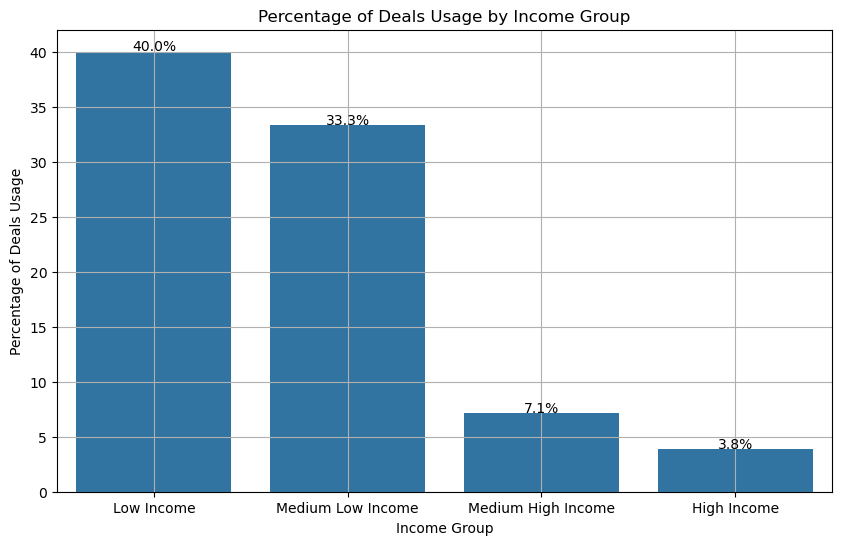

In [60]:
plt.figure(figsize=(10, 6))
ax=sns.barplot(data=deals_by_income,x='Income_Group',y='Pct_Deals_Purchase')
plt.title('Percentage of Deals Usage by Income Group')
plt.xlabel('Income Group')
plt.ylabel('Percentage of Deals Usage')
plt.grid()


for p in ax.patches:
    percentage = '{:.1f}%'.format( p.get_height() )
    ax.annotate(percentage, 
                   (p.get_x() + p.get_width() / 2., p.get_height()-0.8), 
                   ha='center', va='center', 
                   xytext=(0, 10), 
                   textcoords='offset points')
plt.show()

Berdasarkan visualisasi di atas, dapat dilihat bahwa kelompok Income yang semakin tinggi akan menunjukkan persentase penggunaan diskon yang semakin rendah. Penggunaan diskon di sini adalah diskon yang diberikan langsung pada produk-produk di supermarket, berbeda dengan diskon yang diberikan saat campaign. Artinya, **kelompok Income yang lebih rendah cenderung membeli produk yang sedang diskon. Sebaliknya, kelompok Income yang semakin tinggi lebih mampu untuk membeli produk dengan harga normal**.

### RFM Segmentation

In [61]:
# Membuat kolom Monetary, Frequency, dan mengambil Recency dari data

# Monetary: total pengeluaran
df_cleaned['Monetary'] = df_cleaned['Total_Amount']

# Frequency: total jumlah pembelian dari berbagai channel
df_cleaned['Frequency'] = df_cleaned['Total_Purchase']

# Recency sudah ada dalam kolom 'Recency'

# Membuat skor RFM menggunakan kuantil (1-5)
df_cleaned['R_Score'] = pd.qcut(df_cleaned['Recency'], 5, labels=[5, 4, 3, 2, 1]).astype(int)
df_cleaned['F_Score'] = pd.qcut(df_cleaned['Frequency'].rank(method='first'), 5, labels=[1, 2, 3, 4, 5]).astype(int)
df_cleaned['M_Score'] = pd.qcut(df_cleaned['Monetary'].rank(method='first'), 5, labels=[1, 2, 3, 4, 5]).astype(int)

# Gabungkan RFM Score
df_cleaned['RFM_Score'] = df_cleaned['R_Score'].astype(str) + df_cleaned['F_Score'].astype(str) + df_cleaned['M_Score'].astype(str)

# Tampilkan beberapa hasil
df_cleaned[['ID', 'Recency', 'Frequency', 'Monetary', 'R_Score', 'F_Score', 'M_Score', 'RFM_Score']].head()

,ID,Recency,Frequency,Monetary,R_Score,F_Score,M_Score,RFM_Score
0,5524,58,12,1617,3,4,5,345
1,2174,38,3,27,4,1,1,411
2,4141,26,18,776,4,5,4,454
3,6182,26,6,53,4,2,1,421
4,5324,94,11,422,1,3,3,133


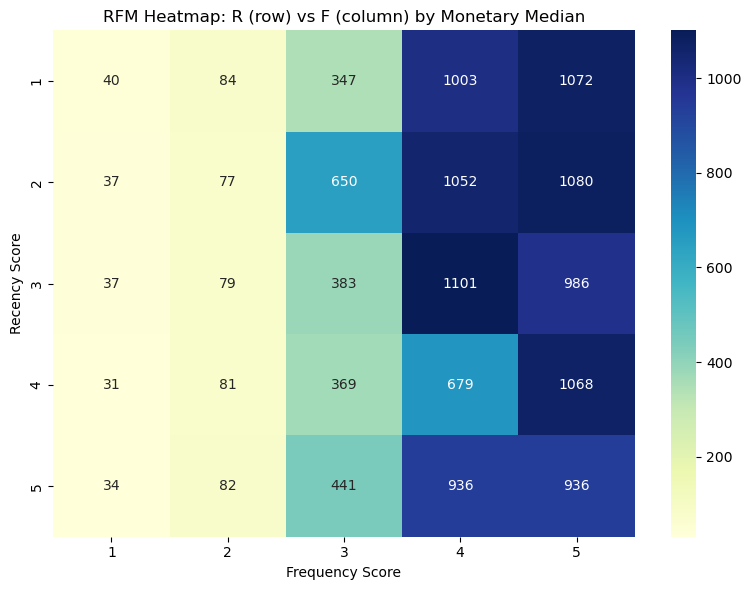

In [62]:
df_cleaned['RFM_Segment']=''

# Segmentasi pelanggan

conditions = [
    (df_cleaned['R_Score'] >= 4) & (df_cleaned['F_Score'] >= 4) & (df_cleaned['M_Score'] >= 4),  # VIP
    (df_cleaned['R_Score'] >= 4) & (df_cleaned['F_Score'] == 3) & (df_cleaned['M_Score'] >= 4),  # Potential
    (df_cleaned['R_Score'] <= 3) & (df_cleaned['F_Score'] >= 4) & (df_cleaned['M_Score'] >= 4),  # Hibernating
    (df_cleaned['R_Score'] >= 4) & (df_cleaned['F_Score'] <= 2) & (df_cleaned['M_Score'] <= 2),  # New
    (df_cleaned['R_Score'] <= 2) & (df_cleaned['F_Score'] == 3) & (df_cleaned['M_Score'] <= 2),  # At Risk
    (df_cleaned['R_Score'] <= 3) & (df_cleaned['F_Score'] <= 2) & (df_cleaned['M_Score'] <= 2)   # Churn
]

choices = ['VIP', 'Potential', 'Hibernating', 'New', 'At Risk', 'Churn'] 

df_cleaned['RFM_Segment'] = np.select(conditions, choices, default='Potential')


# Heatmap Recency vs Frequency berdasarkan rata-rata Monetary
rfm_pivot = df_cleaned.pivot_table(index='R_Score', columns='F_Score', values='Monetary', aggfunc='median')

plt.figure(figsize=(8, 6))
sns.heatmap(rfm_pivot, annot=True, fmt=".0f", cmap="YlGnBu")
plt.title("RFM Heatmap: R (row) vs F (column) by Monetary Median")
plt.ylabel("Recency Score")
plt.xlabel("Frequency Score")
plt.tight_layout()
plt.show()

In [63]:
df_rfm = df_cleaned[['ID', 'Recency', 'Frequency', 'Monetary', 'R_Score', 'F_Score', 'M_Score', 'RFM_Score', 'RFM_Segment']]
df_rfm

,ID,Recency,Frequency,Monetary,R_Score,F_Score,M_Score,RFM_Score,RFM_Segment
0,5524,58,12,1617,3,4,5,345,Hibernating
1,2174,38,3,27,4,1,1,411,New
2,4141,26,18,776,4,5,4,454,VIP
3,6182,26,6,53,4,2,1,421,New
4,5324,94,11,422,1,3,3,133,Potential
...,...,...,...,...,...,...,...,...,...
2235,10870,46,13,1341,3,4,5,345,Hibernating
2236,4001,56,13,444,3,4,3,343,Potential
2237,7270,91,15,1241,1,5,5,155,Hibernating
2238,8235,8,16,843,5,5,4,554,VIP


In [64]:
df_rfm['R_Score'].value_counts()

R_Score
5    456
3    450
4    447
1    446
2    437
Name: count, dtype: int64

In [65]:
df_rfm['F_Score'].value_counts()

F_Score
1    448
4    447
5    447
2    447
3    447
Name: count, dtype: int64

In [66]:
df_rfm['M_Score'].value_counts()

M_Score
1    448
5    447
4    447
3    447
2    447
Name: count, dtype: int64

In [67]:
rfm_count = df_cleaned.groupby('RFM_Segment')['ID'].count().reset_index().rename(columns = {'ID': 'Count of Customer'})
rfm_count['Segment_Percentage'] = (rfm_count['Count of Customer']/rfm_count['Count of Customer'].sum())*100
rfm_count

,RFM_Segment,Count of Customer,Segment_Percentage
0,At Risk,16,0.715564
1,Churn,504,22.540250
2,Hibernating,420,18.783542
3,New,348,15.563506
4,Potential,678,30.322004
5,VIP,270,12.075134


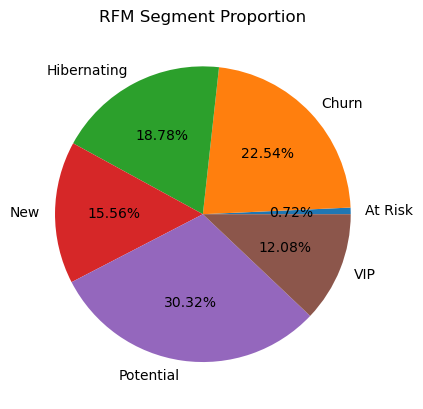

In [68]:
plt.pie(data=rfm_count,x='Segment_Percentage',labels='RFM_Segment', autopct='%.2f%%')
plt.title('RFM Segment Proportion')
plt.show()

Terdapat 12.08% customer yang termasuk dalam segmen VIP yang perlu dipertahankan keberadaannya. Selain itu, customer dengan segmen Potential juga perlu diberi perhatian lebih agar statusnya dapat meningkat menjadi VIP. Proporsinya yang paling besar ini dapat dimanfaatkan untuk memberikan pelayanan atau perlakuan yang maksimal. Segmen New juga perlu diberi perhatian lebih agar dapat menjadi customer yang setia ke depannya.

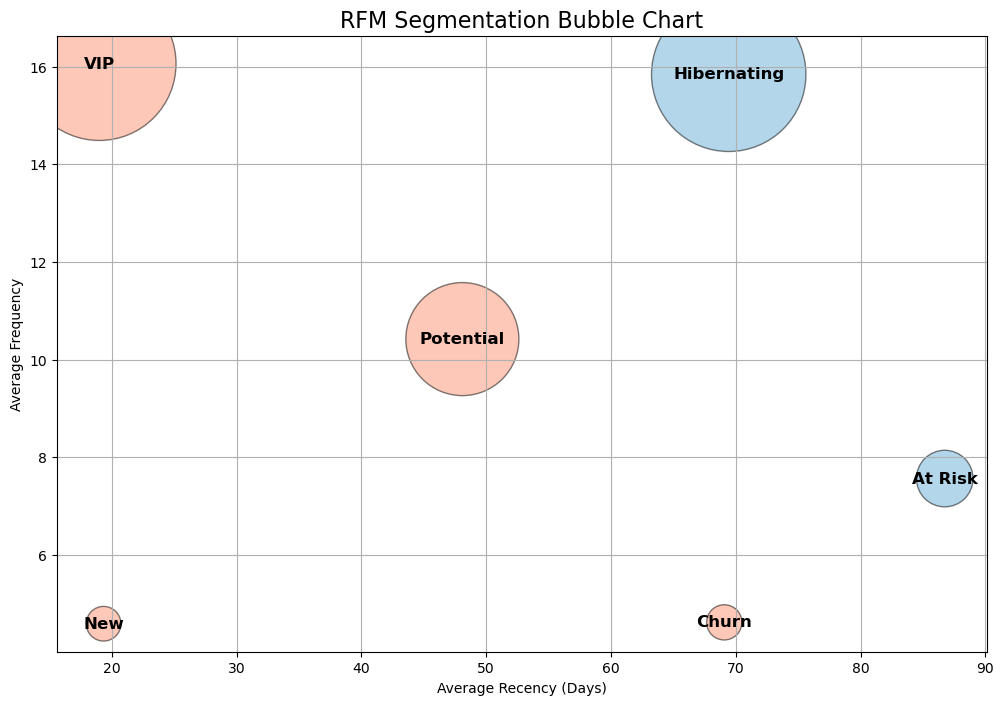

In [69]:
# Agregasi rata-rata Recency, Frequency, Monetary per segmen
rfm_bubble = df_cleaned.groupby('RFM_Segment').agg({
    'Recency': 'mean',
    'Frequency': 'mean',
    'Monetary': 'mean'
}).reset_index()

plt.figure(figsize=(12,8))

# Buat bubble chart
scatter = plt.scatter(
    rfm_bubble['Recency'],           # X: Average Recency
    rfm_bubble['Frequency'],         # Y: Average Frequency
    s=rfm_bubble['Monetary']*10,     # Ukuran bubble (dikali agar proporsional)
    alpha=0.5,
    c=['#6baed6' if 'Risk' in seg or 'Hibernating' in seg or 'Lost' in seg else '#fc9272' for seg in rfm_bubble['RFM_Segment']],
    edgecolors='k'
)

# Tambahkan label pada setiap bubble
for i, row in rfm_bubble.iterrows():
    plt.text(row['Recency'], row['Frequency'], row['RFM_Segment'],
             fontsize=12, fontweight='bold', ha='center', va='center')

plt.title('RFM Segmentation Bubble Chart', fontsize=16)
plt.xlabel('Average Recency (Days)')
plt.ylabel('Average Frequency')
plt.grid(True)
plt.show()

## Conclusion

1. Setelah dilakukan analisis perilaku pembelian, dapat disimpulkan bahwa:
   - Customer tanpa tanggungan cenderung lebih hemat dalam pengeluaran (lebih mengutamakan pengeluaran pada produk-produk dasar)
   - Walaupun jumlahnya paling sedikit, kelompok High Income menyumbang median total penghasilan paling besar ke supermarket. Namun, terdapat perilaku pembelian produk luxury yang tinggi pada kelompok Medium Low Income
   - Customer pada tiap generasi lebih berminat melakukan pembelian di toko langsung dibandingkan di website
   - Customer pada tiap generasi menyumbang penghasilan paling besar pada supermarket melalui pembelian produk wine dan daging
   - Customer akan cenderung menerima campaign diskon terakhir pada tiap tahun
   - Semakin rendah Income tahunan yang dimiliki customer, maka customer akan cenderung membeli produk yang sedang diskon
2. Berdasarkan segmentasi menggunakan RFM (Recency, Frequency, Monetary), didapat bahwa terdapat 6 segmen yang masing-masing perlu diberikan strategi secara berbeda untuk memaksimalkan keberadaannya
3. Strategi pemasaran yang tepat sasaran untuk segmentasi customer yang berbeda perlu dilakukan agar dampak terhadap industri dapat dirasakan secara maksimal, bukan hanya menyasar pada customer secara umum

## Recommendation

**Berdasarkan Kelompok Income**
- Kepada kelompok High Income dan Medium High Income sebagai pemberi kontribusi terbesar untuk pendapatan supermarket, dapat dilakukan penawaran produk-produk yang sesuai dengan daya beli mereka yang tinggi atau diberi informasi mengenai produk-produk premium keluaran terbaru (buah organik impor, wine merk terbaru, daging kualitas tinggi)
- Kepada kelompok Medium Low Income yang cenderung melakukan pembelian produk luxury, dapat diberikan penawaran diskon pada waktu terbatas (flash sale) atau bundling produk luxury dengan produk lain sehingga lebih menguntungkan dari segi customer
- Kepada kelompok Low Income dan Medium Low Income yang sangat berminat terhadap pembelian menggunakan diskon, pihak supermarket dapat menawarkan program loyalitas yang dapat memberikan diskon khusus atau reward berupa poin pada customer sehingga mampu meningkatkan frekuensi pembelian

**Berdasarkan Jumlah Tanggungan**
- Customer yang belum memiliki tanggungan yang cenderung melakukan pembelian di produk-produk dasar seperti bahan makanan, pihak supermarket dapat menawarkan produk bahan makanan dengan harga yang kompetitif namun tetap berkualitas

**Berdasarkan Kelompok Generasi**
- Kepada generasi Baby Boomers dan Gen X yang lebih banyak mengeluarkan biaya untuk produk wine, pihak supermarket dapat mengadakan acara wine tasting sebagai agenda edukasi mengenai wine dari segi kualitas dan keunikan tiap jenisnya juga sebagai kesempatan bagi customer dapat mengeksplor rasa wine lain sehingga mampu meningkatkan daya beli mereka. Pemanfaatan momen-momen khusus seperti Natal, Tahun Baru, Valentine, dan lain-lain untuk memberikan bundling atau diskon juga bisa menjadi alternatif
- Kepada generasi milenial yang proporsi pembelian produk luxury dan basicnya cukup seimbang, pihak supermarket dapat membuat bundling terbatas yang diadakan di momen-momen tertentu untuk produk luxury dan basic agar customer dapat mendapatkan keduanya secara sekaligus

**Berdasarkan Segmentasi RFM**
- VIP: Privilege mendapatkan layanan program loyalitas (reward, diskon khusus, akses ke produk dari lebih awal)
- Potential: Penawaran paket bundling, pemberian diskon tambahan ketika mereka meningkatkan frekuensi belanja
- New: Pemberian layanan khusus customer baru (voucher, diskon pembelian berikutnya), informasi mengenai program loyalitas
- Hibernating: Penawaran spesial, survei kepuasan, berikan info mengenai produk baru
- At Risk: Reminder berupa penawaran terbatas, tawarkan diskon pada produk favorit mereka, evaluasi pelayanan
- Churn: Berikan penawaran yang sangat menarik (diskon besar, reward, dll) dengan harapan mampu menarik mereka kembali, lakukan survei alasan berhenti bertransaksi di supermarket dan jadikan sebagai feedback

**Untuk Customer secara keseluruhan**
- Campaign diskon yang dilakukan dengan intensitas yang tidak terlalu sering (maksimal 3 kali setahun) dapat memaksimalkan respon dari customer, terutama pada saat campaign terakhir di tiap tahun. Waktu campaign juga perlu disesuaikan dengan momen-momen penting seperti Natal, Thanksgiving, Tahun Baru, dan lain-lain.